# FNN MODEL for stroke prediction

### Loading and Exploring the dataset 


In [25]:
import pandas as pd
import os
os.getcwd() # This is where our dataset csv file should be placed

'/Users/fizza/Documents/university/practical business analytics/Assignment/python'

In [26]:
data=pd.read_csv('data_stroke_undersampled.csv')
data.head()

0_10  11_20  21_30  31_40  41_50  51_60  61_70  71_80  81_and_above  age  \
0     1      0      0      0      0      0      0      0             0    1   
1     0      0      0      0      0      0      1      0             0   61   
2     0      0      0      0      0      0      1      0             0   62   
3     0      0      0      0      0      0      1      0             0   70   
4     1      0      0      0      0      0      0      0             0   10   

   ...  formerly_smoked  never_smoked  smokes  Unknown  Private  \
0  ...                0             0       0        1        0   
1  ...                0             1       0        0        0   
2  ...                0             1       0        0        0   
3  ...                0             1       0        0        1   
4  ...                0             0       0        1        0   

   Self_employed  Govt_job  children  Never_worked  stroke  
0              0         0         1             0       0  
1              1         0         0             0       0  
2              0         1         0             0       0  
3              0         0         0             0       0  
4              0         0         1             0       0  

[5 rows x 27 columns]

#### Exploring the dataset

In [28]:
data.describe()

0_10        11_20        21_30        31_40        41_50  \
count  1456.000000  1456.000000  1456.000000  1456.000000  1456.000000   
mean      0.054258     0.048077     0.057692     0.081044     0.104396   
std       0.226604     0.214002     0.233241     0.272996     0.305878   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             51_60        61_70        71_80  81_and_above          age  ...  \
count  1456.000000  1456.000000  1456.000000   1456.000000  1456.000000  ...   
mean      0.179258     0.151786     0.265110      0.058379    55.322802  ...   
std       0.383700     0.358936     0.441543      0.234540    22.081080  ...   
min       0.000000     0.000000     0.000000      0.000000     1.000000  ...   
25%       0.000000     0.000000     0.000000      0.000000    42.000000  ...   
50%       0.000000     0.000000     0.000000      0.000000    59.000000  ...   
75%       0.000000     0.000000     1.000000      0.000000    75.000000  ...   
max       1.000000     1.000000     1.000000      1.000000    82.000000  ...   

       formerly_smoked  never_smoked       smokes      Unknown      Private  \
count      1456.000000   1456.000000  1456.000000  1456.000000  1456.000000   
mean          0.207418      0.369505     0.163462     0.259615     0.587912   
std           0.405596      0.482837     0.369913     0.438574     0.492380   
min           0.000000      0.000000     0.000000     0.000000     0.000000   
25%           0.000000      0.000000     0.000000     0.000000     0.000000   
50%           0.000000      0.000000     0.000000     0.000000     1.000000   
75%           0.000000      1.000000     0.000000     1.000000     1.000000   
max           1.000000      1.000000     1.000000     1.000000     1.000000   

       Self_employed     Govt_job     children  Never_worked       stroke  
count    1456.000000  1456.000000  1456.000000   1456.000000  1456.000000  
mean        0.200549     0.143544     0.063874      0.004121     0.500000  
std         0.400549     0.350747     0.244612      0.064084     0.500172  
min         0.000000     0.000000     0.000000      0.000000     0.000000  
25%         0.000000     0.000000     0.000000      0.000000     0.000000  
50%         0.000000     0.000000     0.000000      0.000000     0.500000  
75%         0.000000     0.000000     0.000000      0.000000     1.000000  
max         1.000000     1.000000     1.000000      1.000000     1.000000  

[8 rows x 27 columns]

0_10                 0
11_20                0
21_30                0
31_40                0
41_50                0
51_60                0
61_70                0
71_80                0
81_and_above         0
age                  0
gender               0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
formerly_smoked      0
never_smoked         0
smokes               0
Unknown              0
Private              0
Self_employed        0
Govt_job             0
children             0
Never_worked         0
stroke               0
dtype: int64


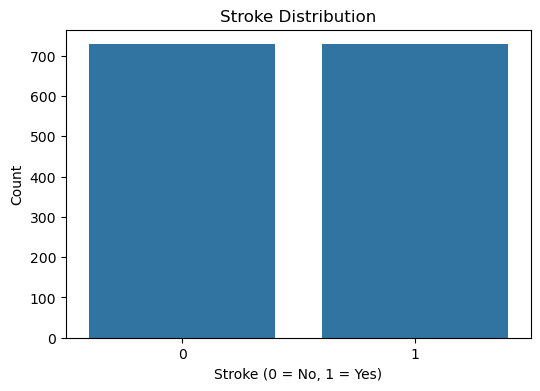


Stroke class distribution (proportion):
stroke
0    0.5
1    0.5
Name: proportion, dtype: float64

Correlation of features with the target variable (stroke):
stroke               1.000000
age                  0.586204
71_80                0.360996
ever_married         0.266288
avg_glucose_level    0.249858
heart_disease        0.231409
hypertension         0.177019
81_and_above         0.149397
61_70                0.139731
Self_employed        0.133791
formerly_smoked      0.108411
bmi                  0.079773
Private              0.058605
51_60                0.037602
smokes               0.037146
Residence_type       0.021982
never_smoked         0.011384
gender              -0.015316
Govt_job            -0.056806
Never_worked        -0.064327
Unknown             -0.144123
41_50               -0.148246
0_10                -0.215267
31_40               -0.216436
11_20               -0.224733
children            -0.238742
21_30               -0.247436
Name: stroke, dtype: float64


In [29]:
import matplotlib.pyplot as plt   # importing pylot and seaborn for visualisations
import seaborn as sns
import numpy as np
print (data.isna().sum()) # checking for empty values

# Distribution of the target variable "stroke"
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=data)
plt.title('Stroke Distribution')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Check for class balance
stroke_distribution = data['stroke'].value_counts(normalize=True)
print("\nStroke class distribution (proportion):")
print(stroke_distribution)

# Display correlation with the target variable
# Calculate the correlation matrix
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['stroke'].sort_values(ascending=False)
print("\nCorrelation of features with the target variable (stroke):")
print(correlation_with_target)


##### Plotting a bar chart for feature correlation with stroke for the top most important predictors for stroke as chosen from the correlation matrix above.

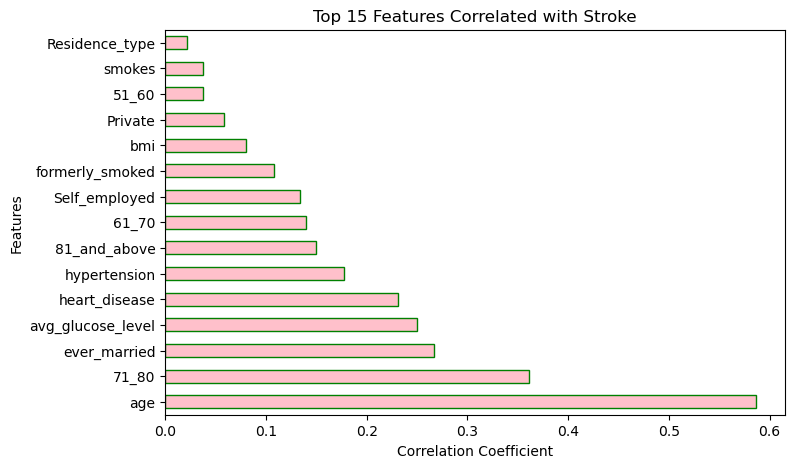

In [31]:
# Top features
top_n = 15
top_features = correlation_with_target.drop('stroke').nlargest(top_n)
# Plot bar plot
plt.figure(figsize=(8, 5))
top_features.plot(kind='barh', color='pink', edgecolor='green')
plt.title(f'Top {top_n} Features Correlated with Stroke')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()



### Exploratory data analysis
The stroke dataset contains 1456 rows and 27 columns with no missing values. 
Breakdown of the columns in the dataset:

##### Columns:
	•	Categorical Features: gender, hypertension, heart_disease, ever_married, Residence_type, etc.
	•	Numerical Features: age, avg_glucose_level, bmi, etc.
	•	Target Variable: stroke
	•	Data Types:
	•	Integer (int64): Most columns are categorical or ordinal.
	•	Float (float64): Continuous variables like avg_glucose_level and bmi
 
#### Data balance
It appears to be balanced regarding the target variable "stroke" (50% for each class) i.e. 50% of the samples correspond to stroke = 1 and 50% to stroke = 0.

#### Features Correlation with stroke 
##### Positive Correlations (values closer to +1):
• Features like age (0.586), 71_80 (0.361), ever_married (0.266), and avg_glucose_level (0.250) have a positive correlation with stroke.

This means that higher values in these features are associated with a higher likelihood of stroke.
For example:

##### • Older age (71_80, 81_and_above) strongly correlates with stroke occurrence.
##### • Higher glucose levels and being married also show moderate correlations.
#### Conclusions:
##### Age: 
The strongest positive correlation (0.586) indicates that older individuals are more likely to have a stroke.
##### Lifestyle/Health Factors: 
Variables like avg_glucose_level, heart_disease, and hypertension are moderately correlated, suggesting that they play a role in stroke risk.
##### Employment and Smoking: 
Features like Self_employed and formerly_smoked have weaker positive correlations, but they might still contribute to stroke risk.
##### Children/Younger Groups: 
Negative correlations for younger age groups and the children category suggest that these groups are at lower risk for stroke.
 

## Applying Feedforward Neural Network (FNN) Model

### Using keras Tuner as a hyperparameter tuning library

Hyperparameter tuning is crucial for improving a model’s performance and overall learning process by finding the best combination of parameters like the number of  layers, learning rate, batch size, and activation functions.
I have used Keras Tuner because it is easy to implement and select the best hyperparameters through it for neural networks.
It uses Random Search to test random hyperparameter combinations. 


##### For hyperparameter tuning , the search algorithm used is RandomSearch.
I am using random search as it is best suited for this binary classification problem.

#### Installing Keras Tuner

In [37]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [38]:
# Import required libraries
import pandas as pd   #for data manipulation and numerical operations
import numpy as np    #for data manipulation and numerical operations

 # sklearn for for preprocessing, splitting data, and evaluating models.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, matthews_corrcoef, accuracy_score
 
# For visualizing 
import matplotlib.pyplot as plt
import seaborn as sns

# for making neural networks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# for performing hyperparameter tuning
from keras_tuner import RandomSearch

#######################################################

# Preprocessing the dataset
X = data.drop('stroke', axis=1)  # Separating the input features (X) and the target variable (y).
y = data['stroke']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


############################################################################ FNN model function ###############################
# Define the function to build the model
def build_model(hp):
# Initialize a Sequential model (a stack of layers)
    model = Sequential()
    
# Add the input layer, specifying the input shape based on the dataset
    model.add(Input(shape=(X_train.shape[1],)))  
# `X_train.shape[1]` gives the number of features in the dataset. The input layer expects this many inputs.

# Add a variable number of hidden layers (between 1 and 5) based on the hyperparameter
    for i in range(hp.Int('num_layers', 2, 6)):  
# `hp.Int` lets us search for the best number of layers dynamically (from 1 to 5).

# Add a Dense (fully connected) layer with variable units and activation function
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),  
# `units` controls the number of neurons. `hp.Int` defines a search space between 16 and 128 neurons, increasing in steps of 16.

            activation=hp.Choice('activation', ['relu', 'tanh', 'sigmoid','elu'])  
# The activation function is chosen dynamically. Each choice affects how the layer transforms the inputs.
        ))
        
# Add a Dropout layer to reduce overfitting
        model.add(Dropout(rate=hp.Float(f'dropout_rate_{i}', min_value=0.3, max_value=0.5, step=0.1)))  
# Dropout randomly disables a fraction of neurons during training. The dropout rate is tuned dynamically.

# Add the output layer with a single neuron and sigmoid activation for binary classification
    model.add(Dense(1, activation='sigmoid'))  
# Sigmoid activation ensures the output is a probability between 0 and 1 (used for binary classification problems).

# Choose an optimizer from the options provided
    optimizer = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop','adamx'])  
# The choice of optimizer affects how the model learns. Adam, SGD, and RMSprop are commonly used optimizers.

# Choose a learning rate for the selected optimizer
    learning_rate = hp.Choice('learning_rate', [5e-3, 1e-3, 5e-4, 1e-4])  
# The learning rate controls how large the steps are in optimizing weights during training.

# Configure the optimizer based on the hyperparameter
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        opt = tf.keras.optimizers.Adamax(learning_rate=learning_rate)
# Each optimizer is initialized with the chosen learning rate.

# Compile the model with the selected optimizer, binary crossentropy loss, and accuracy metric
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])  
# `binary_crossentropy` is suitable for binary classification tasks.
# `accuracy` is used as a metric to track the performance of the model during training.

    return model
# Returns the built and compiled model, ready for training.

############################################################################ FNN model function ###############################

# Hyperparameter tuning
from keras_tuner import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=2,
    directory='tuner_results',
    project_name='stroke_prediction')


# Run the tuner
# using validation data set to evaluate the performace during training and hyperparameter tuning. 
# Here 20% of the data is kept for training validation.

tuner.search(X_train, y_train, epochs=15, validation_split=0.2, verbose=1, batch_size=64)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best model
best_model = tuner.hypermodel.build(best_hps)

# Train the best model  
history = best_model.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size=64, verbose=1 )

# Evaluate the model
predictions = (best_model.predict(X_test) > 0.5).astype(int)



Reloading Tuner from tuner_results/stroke_prediction/tuner0.json
Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6538 - loss: 0.6715 - val_accuracy: 0.7304 - val_loss: 0.5234
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7847 - loss: 0.4709 - val_accuracy: 0.7549 - val_loss: 0.5062
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7982 - loss: 0.4332 - val_accuracy: 0.7843 - val_loss: 0.4873
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8173 - loss: 0.4052 - val_accuracy: 0.7745 - val_loss: 0.4869
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8067 - loss: 0.4204 - val_accuracy: 0.7843 - val_loss: 0.4826
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8213 - loss: 0.3892 - val_accuracy: 0.7745 - val_loss: 0.4867
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8279 - loss: 0.3954 - val_accuracy: 0.7696 - val_loss: 0.4788
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

### Evaluation Metrics

Using Accuracy, Confusion matrix, Precision, Recall, ROC AUC Curve and (MCC) Mathews correlation coefficient.
##### MCC : It provides a balanced evaluation, even when the dataset is imbalanced, which is common in disease prediction (e.g., fewer positive cases of a disease compared to negative cases).
##### ROC AUC Curve : ROC AUC tells you how well your model separates sick and healthy people and works well even if the data is unbalanced. We can choose how much we want to focus on catching every stroke (sensitivity) or avoiding false alarms (specificity).
##### F1 Score : In stroke prediction, we want to find as many stroke prone people as possible (high recall), but also don’t want to falsely label too many healthy people as sick (high precision). The F1 Score combines both precision and recall into a single number, so it’s a good way to measure how well your model balances these two needs.
##### Precision : It is important because if a model falsely predicts a stroke for a person (but he is not prone to it), it could lead to unnecessary tests, treatments, or anxiety. High precision means fewer false alarms.
##### Recall : It is important because we don’t want to miss out on people who actually have the disease. A model with high recall ensures that most sick people are identified, even if it means a few false alarms.
##### accuracy : It will tell us how much our model is right but we need other accompanying metrics like precision and recall with it.

#### For our model objective i.e. Stroke prediction I prefer a good model with high recall to catch all possible cases, even if it means a few false alarms.


In [41]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, best_model.predict(X_test))
mcc = matthews_corrcoef(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("MCC:", mcc)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step
Accuracy: 0.8054919908466819
Confusion Matrix:
 [[162  57]
 [ 28 190]]
Precision: 0.7692307692307693
Recall: 0.8715596330275229
F1 Score: 0.8172043010752689
ROC AUC: 0.8737380084621508
MCC: 0.6165513248703464


If the ROC AUC is 0.87, this indicates that the model has a high ability to correctly distinguish between the positive and negative classes. Here's a general interpretation:

AUC = 0.5: The model performs no better than random guessing (a coin flip).
AUC > 0.5 and < 0.7: The model has some discriminatory ability but is not very good.
AUC = 0.7 to 0.8: The model is considered good.
AUC = 0.8 to 0.9: The model is considered very good.
AUC > 0.9: The model is excellent and has great discriminatory power.
Therefore, an AUC of 0.87 suggests that the model is very good at distinguishing between the classes, with a very low probability of misclassifying instances.

## Visualization

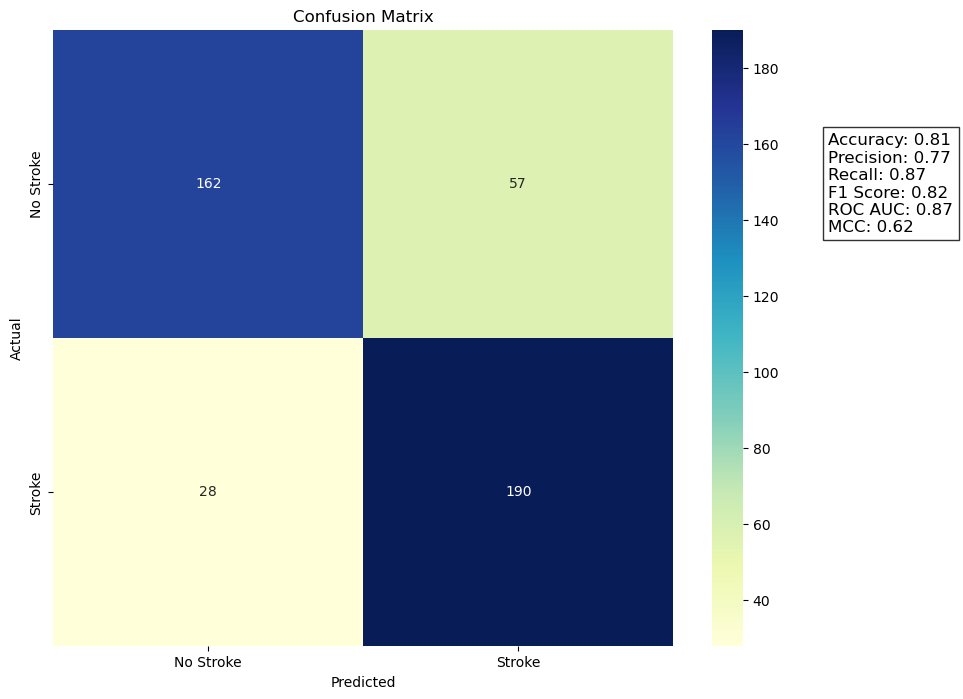

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


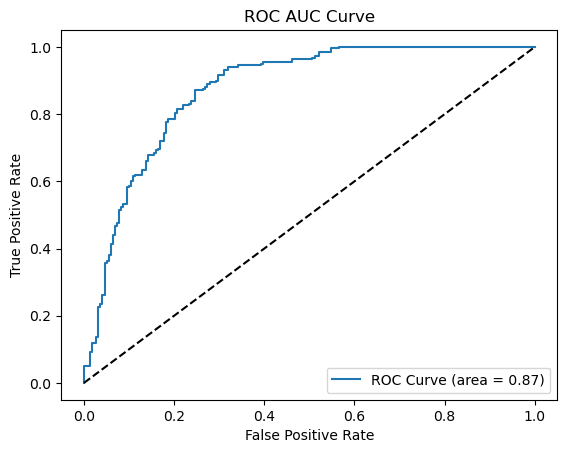

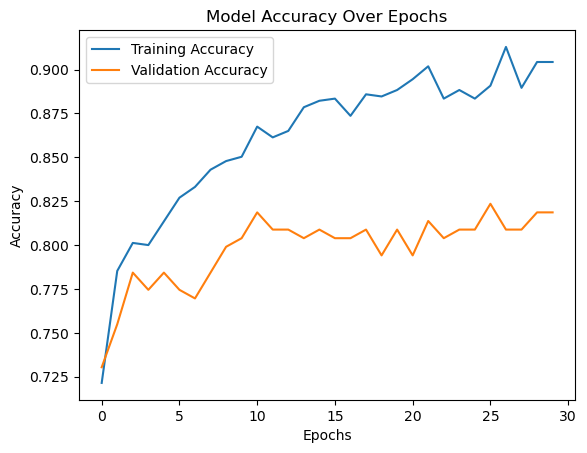

In [44]:
# Confusion Matrix Heatmap with Metrics
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Add metrics to the plot
plt.text(2.5, 0.5, f"Accuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}\nROC AUC: {roc_auc:.2f}\nMCC: {mcc:.2f}",
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8), verticalalignment='center')

plt.show()

# ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

# Accuracy over Epochs
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.show()


### Improving the model for overfitting

To enhance the performance and generalization of the model we will make following changes to our FNN model :

#### 1. Introduce Regularization (L1/L2)
Introduce L1 and L2 regularization to the Dense layers. Regularization helps prevent overfitting by penalizing large weights in the model. The regularization type (L1 or L2) is chosen dynamically using hyperparameter tuning, which allows the model to adapt and potentially improve its generalization. 
##### Reference : (https://builtin.com/data-science/l2-regularization)
#### 2. Batch Normalization
Adds BatchNormalization layers after each Dense layer. Batch normalization normalizes the activations in each layer, which can help stabilize and speed up training by reducing internal covariate shift and improving convergence.
##### Reference: https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization
#### 3. Optimizer and Learning Rate Enhancements
Expands the optimizer choices to include nadam, which combines the advantages of Adam and RMSProp, and fine-tunes the learning rate choices. The learning rate is also selected dynamically using hyperparameter tuning, allowing for more flexibility in training.
#### 4. Increased Hyperparameter Search Space
The search space for the number of units in each layer will be expanded to between 32 and 512, allowing for a larger model with potentially more capacity to learn complex patterns.
#### 5. Early Stopping and Learning Rate Scheduling
Adds EarlyStopping to stop training if the validation loss does not improve for 5 consecutive epochs, preventing overfitting and unnecessary training. ReduceLROnPlateau will also be added to reduce the learning rate if the validation loss plateaus, helping the model converge better.
#### 6. Model Checkpointing
Adds ModelCheckpoint, which saves the best model (based on validation accuracy) during training. This ensures that the best version of the model is saved and can be used for evaluation.
#### 7. More Hyperparameter Search Trials
The number of trials will be increased to 30, which allows for a more thorough search of the hyperparameter space, potentially finding a better model configuration.

In [47]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.regularizers import l1, l2
from keras_tuner import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Load the dataset
data = pd.read_csv('data_stroke_undersampled.csv')

# Preprocessing the dataset
X = data.drop('stroke', axis=1)
y = data['stroke']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the function to build the model
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    
    # Add variable hidden layers with L1/L2 regularization and Batch Normalization 
    # code help taken from https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization
    
    for i in range(hp.Int('num_layers', 2, 6)):
        # Decide the regularization type
        regularizer_type = hp.Choice('regularizer_type', ['l1', 'l2'])
        if regularizer_type == 'l1':
            regularizer = l1(hp.Float('l1_value', min_value=0.001, max_value=0.01, step=0.002))
        else:
            regularizer = l2(hp.Float('l2_value', min_value=0.001, max_value=0.01, step=0.002))
        
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
            activation=hp.Choice('activation', ['relu', 'tanh', 'sigmoid', 'elu']),
            kernel_regularizer=regularizer
        ))
        model.add(BatchNormalization())  # Normalize activations
        model.add(Dropout(rate=hp.Float(f'dropout_rate_{i}', min_value=0.3, max_value=0.6, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Optimizer and learning rate
    optimizer = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop', 'adamax', 'nadam'])
    learning_rate = hp.Choice('learning_rate', [5e-3, 1e-3, 5e-4, 1e-4])

    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'nadam':
        opt = tf.keras.optimizers.Nadam(learning_rate=learning_rate)
    else:
        opt = tf.keras.optimizers.Adamax(learning_rate=learning_rate)

    # Compile the model
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter tuning
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=30,  # Increased number of trials for better search
    executions_per_trial=2,
    directory='tuner_results',
    project_name='stroke_prediction_optimized'
)

# Run the tuner
tuner.search(X_train, y_train, epochs=20, validation_split=0.2, verbose=1, batch_size=64)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best model
best_model = tuner.hypermodel.build(best_hps)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Allow more epochs to stabilize
    restore_best_weights=True
)

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

# Model checkpoint
checkpoint = ModelCheckpoint(
    'best_model.keras', 
    monitor='val_accuracy', 
    save_best_only=True, 
    mode='max'
)

# Train the best model
history2 = best_model.fit(
    X_train, y_train, 
    epochs=50, 
    validation_split=0.2, 
    batch_size=64, 
    verbose=1,
    callbacks=[early_stopping, lr_scheduler, checkpoint]
)

# Evaluate the model
predictions = (best_model.predict(X_test) > 0.5).astype(int)


Reloading Tuner from tuner_results/stroke_prediction_optimized/tuner0.json
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6609 - loss: 1.4178 - val_accuracy: 0.7745 - val_loss: 1.0557 - learning_rate: 0.0050
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7704 - loss: 1.0480 - val_accuracy: 0.7451 - val_loss: 1.0306 - learning_rate: 0.0050
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7528 - loss: 1.0338 - val_accuracy: 0.7843 - val_loss: 0.9982 - learning_rate: 0.0050
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8003 - loss: 0.9561 - val_accuracy: 0.7745 - val_loss: 0.9858 - learning_rate: 0.0050
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8033 - loss: 0.9537 - val_accuracy: 0.7843 - val_loss: 0.9808 - learning_rate: 0.0050
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8144 - loss: 0.9045 - val_accuracy: 0.7598 - val_loss: 0.9556 - learning_rate: 0.0050
Epoch 7/50
13/13 ━━━━━━━

### Evaluation Metrics

In [49]:
# Evaluation Metrics
accuracy2 = accuracy_score(y_test, predictions)
conf_matrix2 = confusion_matrix(y_test, predictions)
precision2 = precision_score(y_test, predictions)
recall2 = recall_score(y_test, predictions)
f12 = f1_score(y_test, predictions)
roc_auc2 = roc_auc_score(y_test, best_model.predict(X_test))
mcc2 = matthews_corrcoef(y_test, predictions)

print("Accuracy:", accuracy2)
print("Confusion Matrix:\n", conf_matrix2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1 Score:", f12)
print("ROC AUC:", roc_auc2)
print("MCC:", mcc2)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.8306636155606407
Confusion Matrix:
 [[165  54]
 [ 20 198]]
Precision: 0.7857142857142857
Recall: 0.908256880733945
F1 Score: 0.8425531914893617
ROC AUC: 0.8942650077499894
MCC: 0.6695965187622207


### HyperParameters for the improved FNN model
Here are the best hyperparameters tuned for model performance

In [51]:
# Extracting the best hyperparameters
num_layers = best_hps.get('num_layers')
layer_details = []

# Collect details for each layer
for i in range(num_layers):
    layer_details.append({
        "Layer": f"Layer {i+1}",
        "Neurons": best_hps.get(f'units_{i}'),
        "Activation": best_hps.get('activation'),
        "Dropout Rate": best_hps.get(f'dropout_rate_{i}'),
        "Regularizer": best_hps.get('regularizer_type'),
        "Regularizer Value": best_hps.get('l1_value') if best_hps.get('regularizer_type') == 'l1' else best_hps.get('l2_value'),
    })

# Add output layer details
layer_details.append({
    "Layer": "Output Layer",
    "Neurons": 1,
    "Activation": "sigmoid",
    "Dropout Rate": "N/A",
    "Regularizer": "None",
    "Regularizer Value": "N/A",
})

# Add training parameters
training_details = {
    "Parameter": ["Test Size", "Validation Split", "Epochs", "Patience", "Batch Size", "Learning Rate", "Optimizer"],
    "Value": [
        0.3,  # Test size
        0.2,  # Validation split
        50,  # Epochs
        5,  # Patience
        34,  # Batch size
        best_hps.get('learning_rate'),  # Learning rate
        best_hps.get('optimizer'),  # Optimizer
    ]
}

# Create DataFrames for display
layer_df = pd.DataFrame(layer_details)
training_df = pd.DataFrame(training_details)

# Display the tables
print("Layer Details:")
print(layer_df.to_string(index=False))  # Display layer details as a table

print("\nTraining Parameters:")
print(training_df.to_string(index=False))  # Display training parameters as a table

Layer Details:
       Layer  Neurons Activation Dropout Rate Regularizer Regularizer Value
     Layer 1      384       tanh          0.3          l2             0.001
     Layer 2      384       tanh          0.3          l2             0.001
     Layer 3       32       tanh          0.3          l2             0.001
Output Layer        1    sigmoid          N/A        None               N/A

Training Parameters:
       Parameter  Value
       Test Size    0.3
Validation Split    0.2
          Epochs     50
        Patience      5
      Batch Size     34
   Learning Rate  0.005
       Optimizer adamax


## Visualization for improved FNN Model

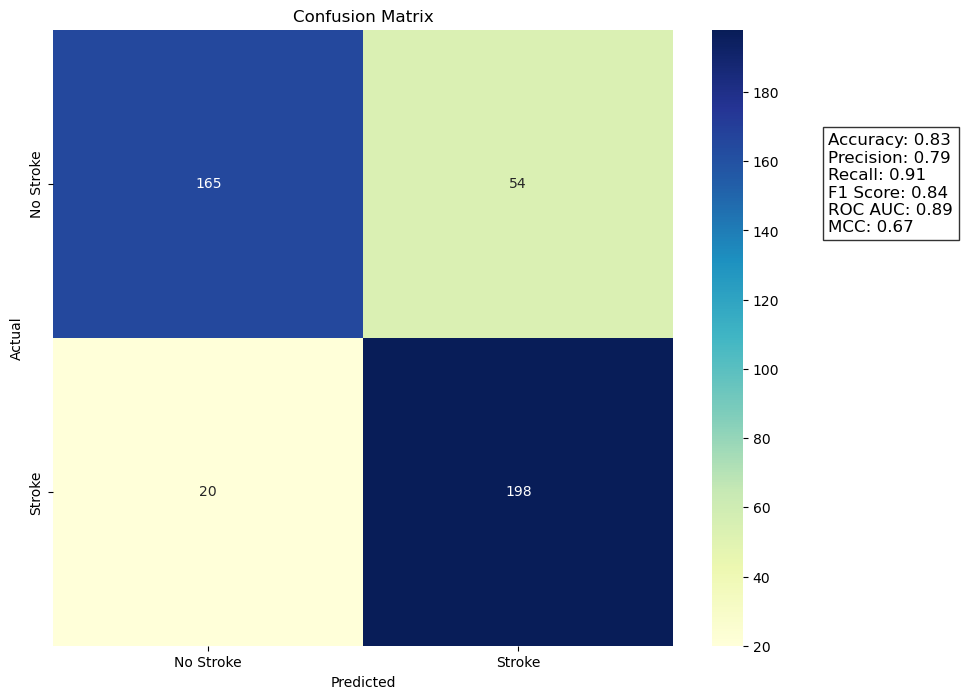

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


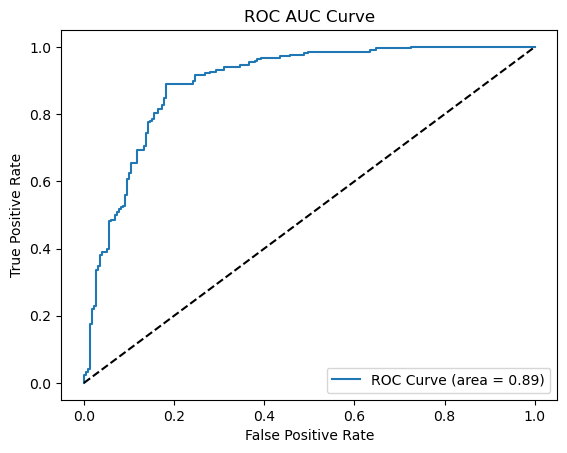

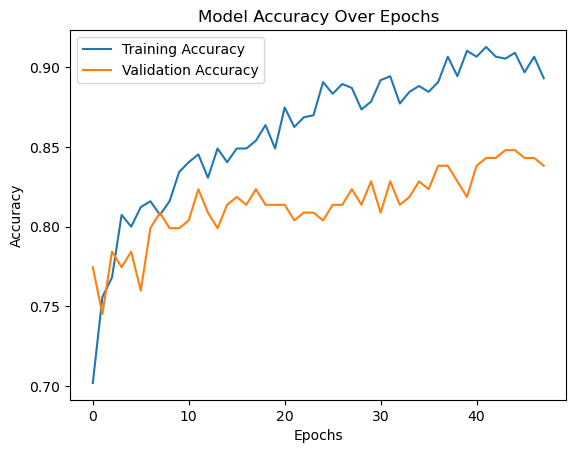

In [53]:
# Confusion Matrix Heatmap with Metrics
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Add metrics to the plot
plt.text(2.5, 0.5, f"Accuracy: {accuracy2:.2f}\nPrecision: {precision2:.2f}\nRecall: {recall2:.2f}\nF1 Score: {f12:.2f}\nROC AUC: {roc_auc2:.2f}\nMCC: {mcc2:.2f}",
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8), verticalalignment='center')

plt.show()

# ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

# Accuracy over Epochs
plt.figure()
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.show()


### Observations from evaluation metrics

##### A higher recall indicates the model is better at catching true positives, which is critical in stroke prediction.

##### As recall (identifying strokes) is our priority, the current improved model is better as it favors recall over precision.

# Comparing first FNN model and improved FNN model

## Accuracy over epochs

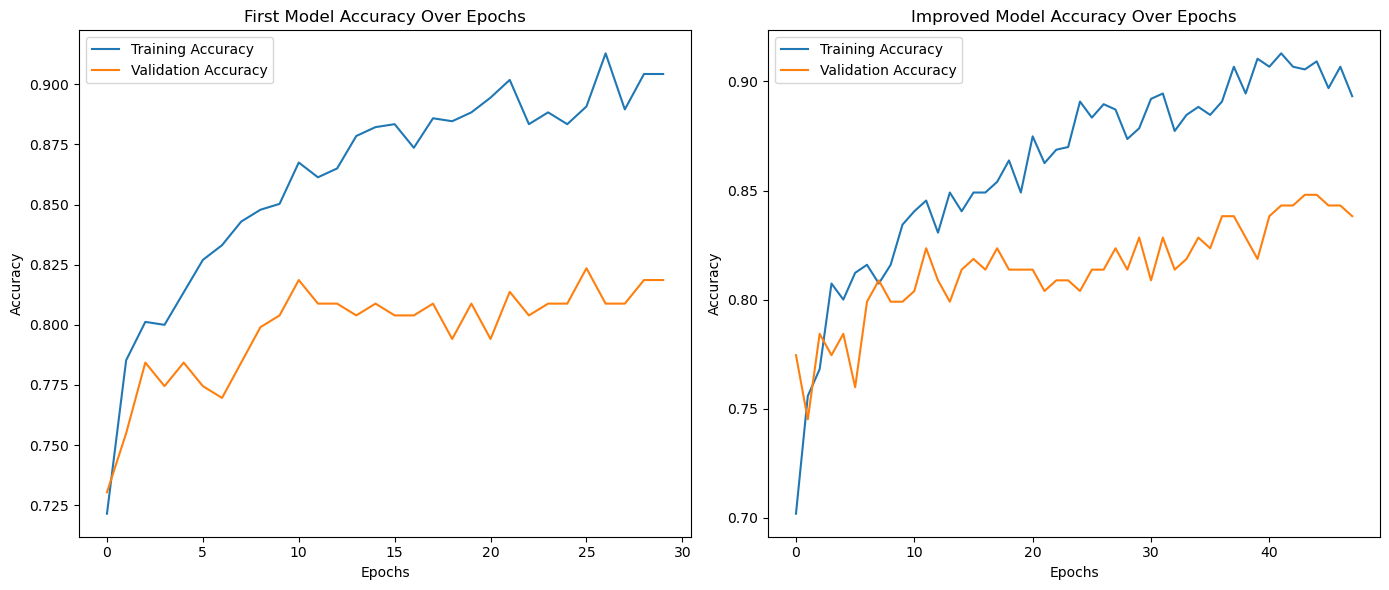

In [59]:
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for the first model
axs[0].plot(history.history['accuracy'], label='Training Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('First Model Accuracy Over Epochs')
axs[0].legend()

# Plot for the second model
axs[1].plot(history2.history['accuracy'], label='Training Accuracy')
axs[1].plot(history2.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Improved Model Accuracy Over Epochs')
axs[1].legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

First model has a larger gap between training and validation accuracies.This suggests overfitting—the model is memorizing the training data but not generalizing well to new data.This makes it less effective for real-world stroke prediction.

In the improved model the smaller gap between training and validation accuracies suggests better generalization for stroke prediction because it generalizes well to new data.


## Comparing metrics

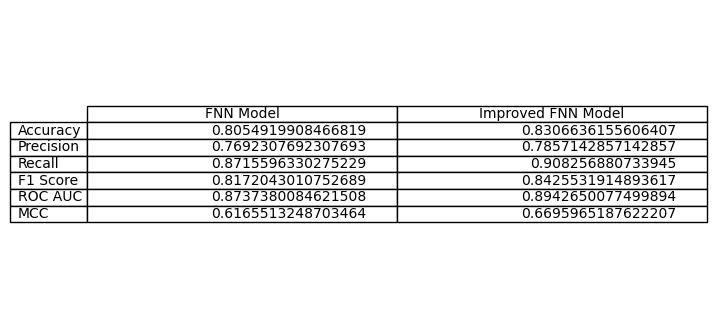

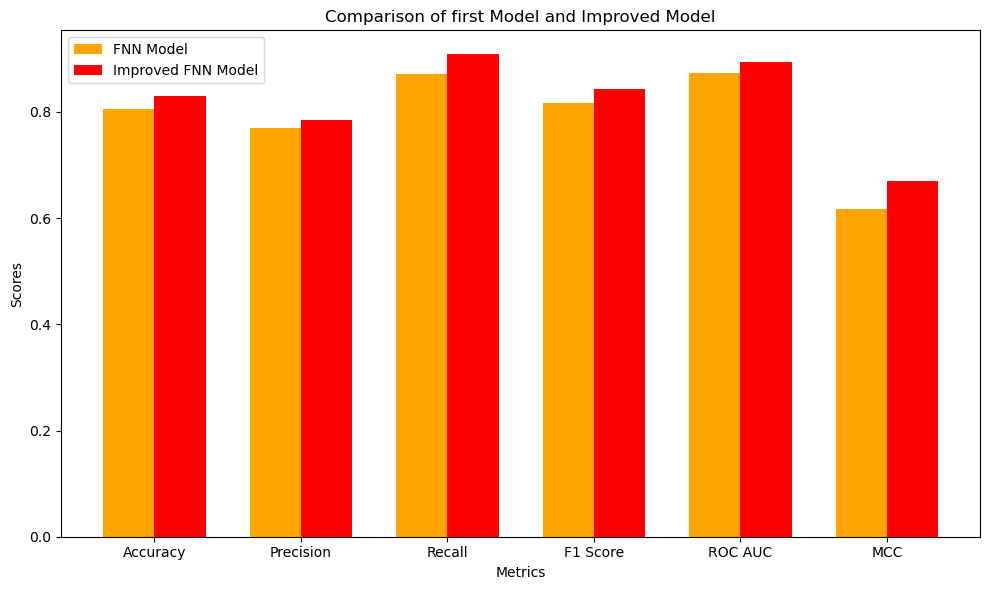

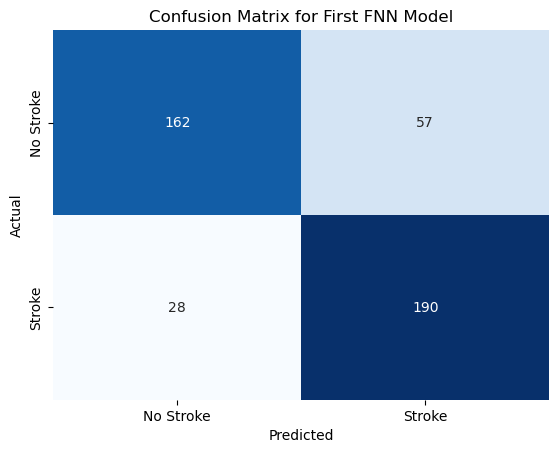

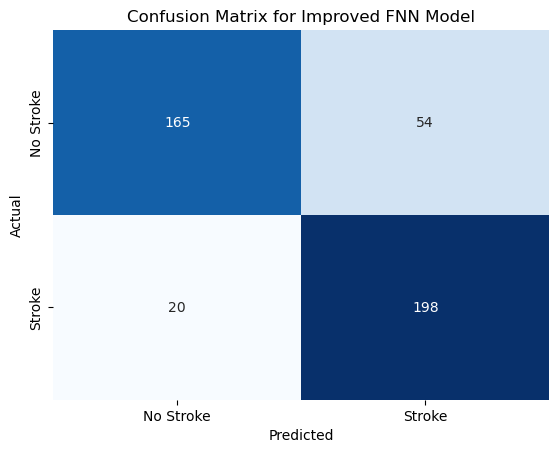

In [62]:
## comparing both metrics for previous and improved models
model_1_metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc,
    'MCC': mcc
}

model_2_metrics = {
    'Accuracy': accuracy2,
    'Precision': precision2,
    'Recall': recall2,
    'F1 Score': f12,
    'ROC AUC': roc_auc2,
    'MCC': mcc2
}

# Create a DataFrame for easy visualization
metrics_df = pd.DataFrame({
    'FNN Model': model_1_metrics,
    'Improved FNN Model': model_2_metrics
})

# Plot the table
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust size as needed
ax.axis('tight')
ax.axis('off')
ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns, rowLabels=metrics_df.index, loc='center')

plt.show()

# Metrics for Model 1 and Model 2
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'MCC']
model_1_scores = [accuracy, precision, recall, f1, roc_auc, mcc]
model_2_scores = [accuracy2, precision2, recall2, f12, roc_auc2, mcc2]

# Set positions for the bars
x = np.arange(len(metrics))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Plot bars for both models
ax.bar(x - bar_width/2, model_1_scores, bar_width, label='FNN Model', color='orange')
ax.bar(x + bar_width/2, model_2_scores, bar_width, label='Improved FNN Model', color='red')

# Add labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of first Model and Improved Model')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Plot confusion matrix for Model 1

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title('Confusion Matrix for First FNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for Model 2
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title('Confusion Matrix for Improved FNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Analysis after evaluation of FNN models:
The Improved FNN Model has a much higher recall (91%) compared to the original model (87%), meaning it’s better at identifying people who are at risk of having a stroke. So, the Improved FNN Model is the better choice for my objective to catch most people who actually have a stroke.

	• The Improved FNN Model shows a significant improvement across all key metrics: accuracy, precision, recall, F1 score, ROC AUC, and MCC.
	• The improvements are likely due to the regularization techniques, batch normalization, more extensive hyperparameter tuning, and training enhancements like early stopping, learning rate scheduling, and model checkpointing in the second model.
 
The improvements in the model’s performance, as seen in the evaluation metrics, have important implications for stroke prediction. 

1. Higher Accuracy (83%)
	• The improved model correctly predicts the presence or absence of a stroke in 84% of cases, which is a significant improvement from the initial 80%.
	• Impact on stroke prediction: A higher accuracy means the model is better at identifying both stroke and non-stroke cases. This is important in a medical context because it reduces the likelihood of misdiagnosing a patient.

2. Increased Precision (78%)
	• Precision refers to the percentage of true positive stroke predictions out of all the cases predicted as positive (stroke). The improved model’s precision has increased by a tiny bit, meaning fewer false positives.
	• Impact on stroke prediction: Higher precision means that the model is less likely to incorrectly classify healthy individuals as having a stroke. In medical practice, this is crucial because misdiagnosing a healthy person could lead to unnecessary treatments, tests, or anxiety for the patient. Both models are almost the same here, with the improved model being just a tiny bit better. This means the positive predictions are accurate in both models.

3. Improved Recall (91%)
	• Recall measures the percentage of actual stroke cases that the model correctly identifies. The improved model has a recall rate of 91%, meaning it correctly identifies 91% of all stroke cases.
	• Impact on stroke prediction: A higher recall is critical for stroke prediction because it means the model is much better at catching the majority of actual stroke cases. In a healthcare setting, this reduces the risk of missing a stroke diagnosis, which could lead to delayed treatment or worse patient outcomes. Early detection of strokes is vital for timely intervention and better recovery chances.

4. Better F1 Score (84%)
	• The F1 score is the harmonic mean of precision and recall. The improved model has a higher F1 score, reflecting a better balance between precision and recall.
	• Impact on stroke prediction: A higher F1 score suggests that the model performs well in both identifying stroke cases and avoiding false positives. For stroke prediction, this means the model is both sensitive (detecting most strokes) and specific (avoiding unnecessary false alarms).

5. Improved ROC AUC (89%)
   The improved model is slightly better at distinguishing between strokes and non-strokes.
	• The improved model has a higher ROC AUC, indicating that it has a better ability to discriminate between stroke and non-stroke patients.
	• Impact on stroke prediction: A higher ROC AUC means the model is better at distinguishing between stroke and non-stroke cases across all thresholds. This is important for ensuring that the model can be used effectively in different clinical scenarios, where the trade-off between sensitivity and specificity might need to be adjusted.

7. Improved Matthews Correlation Coefficient (MCC) (67%)
	• The MCC is a balanced measure that takes into account true positives, true negatives, false positives, and false negatives. The improved model has a higher MCC meaning it’s a bit better overall at handling both positive and negative cases also indicating a better overall performance, especially when dealing with imbalanced data (e.g., more non-stroke cases than stroke cases).
	• Impact on stroke prediction: A higher MCC means that the model is more reliable in its predictions, with fewer misclassifications overall. In stroke prediction, this is particularly valuable in ensuring that the model is not biased toward predicting one class (e.g., non-stroke) over the other, which could lead to missing critical stroke cases.

#### Overall Impact on Stroke Prediction:
	• Better detection: The improved model is more likely to detect actual strokes (higher recall), which is crucial for early intervention.
	• Fewer false alarms: With reasonably good precision, the model is less likely to falsely diagnose someone as having a stroke, reducing unnecessary treatments or tests.
	• More balanced predictions: The higher F1 score and MCC indicate that the model is making more balanced and reliable predictions, crucial for a real-world clinical setting where both false positives and false negatives can have serious consequences.
	• Improved clinical decision-making: With these improvements, healthcare professionals can trust the model more, using it as a valuable tool for stroke risk assessment and early detection, ultimately leading to better patient outcomes.

##### We could target values closer to 0.8 MCC and 90% F1 score, but 84% F1 is already excellent in most practical applications.


# Stacking Ensemble Model for Stroke Prediction
I am using stacked generalization to train several different models (base learners) and then combining their predictions using a meta-model (stacker).

### Base Models:
	• LightGBM
	• CatBoostClassifier
	• HistGradientBoostingClassifier - A Scikit-learn implementation of gradient boosting that is highly efficient and 
      handles both numerical and categorical features.
### Meta-Model: 
CatBoostClassifier

#### Why this configuration of ensemble stacking model ?

This stacking ensemble is chosen due to its performance, minimal preprocessing, and ease of implementation. 
It is well-suited for tabular data with a mix of categorical and numerical variables, and the gradient boosting models will likely yield higher accuracy and clearer feature importance.

#### Strengths:
	1. Optimized for Tabular Data:
       Gradient boosting models like LightGBM, CatBoost, and HistGradientBoosting are specifically designed for 
       structured/tabular datasets, making them ideal for stroke prediction.
	2. Handles Missing and Categorical Data:
	   CatBoost and LightGBM handle categorical data natively without preprocessing.
	   Gradient boosting models are robust against missing values, simplifying preprocessing.
	3. Minimal Preprocessing Required:
	   No need to scale data or apply extensive encoding techniques.
	4. High Accuracy and Interpretability:
	   Gradient boosting models provide feature importance metrics, making it easier to identify key predictors for strokes
       (e.g. hypertension, age, BMI).

#### Ease of Implementation:
	•	Very straightforward to implement in Python using libraries like LightGBM,CatBoost, and scikit-learn.
	•	Requires hyperparameter tuning for optimal performance, but default settings often yield competitive results.



# Building Stacking Ensemble model 

#### Installing lightgbm catboost

In [70]:
pip install lightgbm catboost

Note: you may need to restart the kernel to use updated packages.


#### Loading the dataset and exploring it.

In [72]:
# Load the dataset
import pandas as pd
file_path = 'data_stroke_undersampled.csv' 
stroke_data = pd.read_csv(file_path)
stroke_data.head()


0_10  11_20  21_30  31_40  41_50  51_60  61_70  71_80  81_and_above  age  \
0     1      0      0      0      0      0      0      0             0    1   
1     0      0      0      0      0      0      1      0             0   61   
2     0      0      0      0      0      0      1      0             0   62   
3     0      0      0      0      0      0      1      0             0   70   
4     1      0      0      0      0      0      0      0             0   10   

   ...  formerly_smoked  never_smoked  smokes  Unknown  Private  \
0  ...                0             0       0        1        0   
1  ...                0             1       0        0        0   
2  ...                0             1       0        0        0   
3  ...                0             1       0        0        1   
4  ...                0             0       0        1        0   

   Self_employed  Govt_job  children  Never_worked  stroke  
0              0         0         1             0       0  
1              1         0         0             0       0  
2              0         1         0             0       0  
3              0         0         0             0       0  
4              0         0         1             0       0  

[5 rows x 27 columns]

In [73]:
stroke_data.describe()

0_10        11_20        21_30        31_40        41_50  \
count  1456.000000  1456.000000  1456.000000  1456.000000  1456.000000   
mean      0.054258     0.048077     0.057692     0.081044     0.104396   
std       0.226604     0.214002     0.233241     0.272996     0.305878   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             51_60        61_70        71_80  81_and_above          age  ...  \
count  1456.000000  1456.000000  1456.000000   1456.000000  1456.000000  ...   
mean      0.179258     0.151786     0.265110      0.058379    55.322802  ...   
std       0.383700     0.358936     0.441543      0.234540    22.081080  ...   
min       0.000000     0.000000     0.000000      0.000000     1.000000  ...   
25%       0.000000     0.000000     0.000000      0.000000    42.000000  ...   
50%       0.000000     0.000000     0.000000      0.000000    59.000000  ...   
75%       0.000000     0.000000     1.000000      0.000000    75.000000  ...   
max       1.000000     1.000000     1.000000      1.000000    82.000000  ...   

       formerly_smoked  never_smoked       smokes      Unknown      Private  \
count      1456.000000   1456.000000  1456.000000  1456.000000  1456.000000   
mean          0.207418      0.369505     0.163462     0.259615     0.587912   
std           0.405596      0.482837     0.369913     0.438574     0.492380   
min           0.000000      0.000000     0.000000     0.000000     0.000000   
25%           0.000000      0.000000     0.000000     0.000000     0.000000   
50%           0.000000      0.000000     0.000000     0.000000     1.000000   
75%           0.000000      1.000000     0.000000     1.000000     1.000000   
max           1.000000      1.000000     1.000000     1.000000     1.000000   

       Self_employed     Govt_job     children  Never_worked       stroke  
count    1456.000000  1456.000000  1456.000000   1456.000000  1456.000000  
mean        0.200549     0.143544     0.063874      0.004121     0.500000  
std         0.400549     0.350747     0.244612      0.064084     0.500172  
min         0.000000     0.000000     0.000000      0.000000     0.000000  
25%         0.000000     0.000000     0.000000      0.000000     0.000000  
50%         0.000000     0.000000     0.000000      0.000000     0.500000  
75%         0.000000     0.000000     0.000000      0.000000     1.000000  
max         1.000000     1.000000     1.000000      1.000000     1.000000  

[8 rows x 27 columns]

#### Applying Stacking ensemble model on the data

In [75]:
# importing libraries for visualisation, numerical operations and stacking 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import (
    matthews_corrcoef,
    f1_score,
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    roc_curve,
    confusion_matrix
)
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

# Getting feature and target variables from the data and splitting data into train and test for evaluating model performance on unseen data.

# Splitting data into features (X) and target (y)
X = stroke_data.drop(columns=['stroke'])
y = stroke_data['stroke']

# Split the dataset into training and testing sets : training (70%) and testing (30%) sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# StandardScaler standardizes numerical features by removing the mean and scaling to unit variance.
# It ensures all features are on the same scale, improving model performance.

# Standardizing the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Setting up my Stacking ensemble model using StackingClassifier.
# The Stacking setup combines my chosen base models (light gbm, catboost and histgradient) and a meta-model to make predictions. 


# Define base models
# used verbose=0: it Suppresses unnecessary output (specific to CatBoost).
base_estimators = [
    ('lightgbm', LGBMClassifier(random_state=42)),
    ('catboost', CatBoostClassifier(verbose=0, random_state=42)),
    ('histgradient', HistGradientBoostingClassifier(random_state=42)),
]

# Define the meta-model
# Meta-model that combines predictions from base models and also learns to correct their errors
meta_model = CatBoostClassifier(verbose=0, random_state=42)

# Stacking classifier and cross validation 
# in the parameters of this classifier cv=5: using 5-fold cross-validation to train the base models.
# Each base model is trained 5 times, once for each fold:
# i.e. Train on 4 folds (80%) and validate on the remaining fold (20%).
# This ensures that every data point in the training set is used for both training and validation.
# After training, the base models make predictions on the validation fold during each iteration.
# These predictions are stored and combined into a new dataset (called stacked predictions).
# Meta-model is trained on the stacked predictions generated by the base models.
# and then the entire pipeline is used to make predictions on the test set (X_test). Base models are trained on the entire training data (X_train).
# Their predictions are passed to the meta-model, which makes the final prediction.


stacking_clf = StackingClassifier(
    estimators=base_estimators, final_estimator=meta_model, cv=5
)

# Fit the model on the training data i.e. training the models
stacking_clf.fit(X_train, y_train)

# Predict and evaluate on test data
y_pred = stacking_clf.predict(X_test)

# Below line Predicts the probabilities of the positive class (stroke) useful for roc_auc_score and decision making.
# [:, 1]: this slices the second column of the array, which contains the predicted probabilities for the “target” class i.e. if a patient has a stroke).
# The first column ([:, 0]) contains the probabilities of the class 0.
# The second column ([:, 1]) contains the probabilities of the class 1.

y_pred_proba = stacking_clf.predict_proba(X_test)[:, 1]



[LightGBM] [Info] Number of positive: 510, number of negative: 509
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 1019, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500491 -> initscore=0.001963
[LightGBM] [Info] Start training from score 0.001963
[LightGBM] [Info] Number of positive: 408, number of negative: 407
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 653
[LightGBM] [Info] Number of data points in the train set: 815, number of used features: 25
[LightGBM] [Info] [binary:BoostFr

## Evaluating Stacking Ensemble Model

#### Evaluation metrics being used are:
##### MCC, f1 score, confusion matrix, accuracy, roc_auc curve, precision and recall 

In [78]:
# Compute evaluation metrics
# MCC: Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred)

# F1 Score: Harmonic mean of precision and recall
f1 = f1_score(y_test, y_pred)

# Accuracy: Proportion of correctly predicted instances
accuracy = accuracy_score(y_test, y_pred)

# ROC AUC Score: Measures the ability of the model to distinguish between classes
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Precision: Proportion of true positive predictions out of all positive predictions
precision = precision_score(y_test, y_pred)

# Recall: Proportion of true positive predictions out of all actual positives
recall = recall_score(y_test, y_pred)

# Confusion Matrix: A summary of prediction results
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC Curve: Calculate false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Store metrics in a dictionary for easy comparison
evaluation_metrics = {
    "MCC": mcc,
    "F1 Score": f1,
    "Accuracy": accuracy,
    "ROC AUC Score": roc_auc,
    "Precision": precision,
    "Recall": recall,
    "Confusion Matrix": conf_matrix,
    "ROC Curve": {"FPR": fpr, "TPR": tpr, "Thresholds": thresholds},
}

# Print the metrics
for metric, value in evaluation_metrics.items():
    if metric != "ROC Curve":
        print(f"{metric}: {value}")
    else:
        print(f"{metric}:")
        print(f"  FPR: {value['FPR']}")
        print(f"  TPR: {value['TPR']}")
        print(f"  Thresholds: {value['Thresholds']}")


MCC: 0.6789036943338258
F1 Score: 0.8453159041394336
Accuracy: 0.8375286041189931
ROC AUC Score: 0.9159649784257049
Precision: 0.8049792531120332
Recall: 0.8899082568807339
Confusion Matrix: [[172  47]
 [ 24 194]]
ROC Curve:
  FPR: [0.         0.         0.         0.00456621 0.00456621 0.00456621
 0.00456621 0.00913242 0.00913242 0.00913242 0.00913242 0.01369863
 0.01369863 0.01826484 0.01826484 0.01826484 0.01826484 0.02739726
 0.02739726 0.03196347 0.03196347 0.04109589 0.04109589 0.0456621
 0.0456621  0.0456621  0.0456621  0.0456621  0.0456621  0.05479452
 0.05479452 0.06392694 0.06392694 0.06392694 0.06849315 0.06849315
 0.07305936 0.07305936 0.07762557 0.07762557 0.08219178 0.08219178
 0.0913242  0.0913242  0.09589041 0.09589041 0.10045662 0.10045662
 0.10958904 0.10958904 0.10958904 0.10958904 0.11415525 0.11415525
 0.12328767 0.12328767 0.12785388 0.12785388 0.13242009 0.13242009
 0.14611872 0.14611872 0.15068493 0.15068493 0.15525114 0.15525114
 0.15981735 0.15981735 0.1689497

### Visualization of evaluation metrics for the Stacking Ensemble

Plotting ROC AUC curve , confusion matrix and bar chart for feature importance to visualise what factors are more important in stroke prediction 

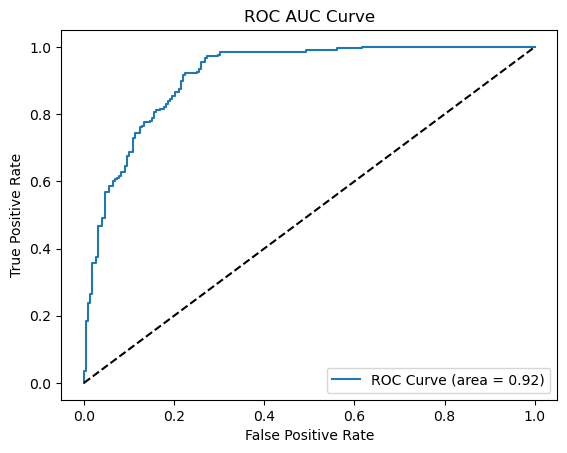

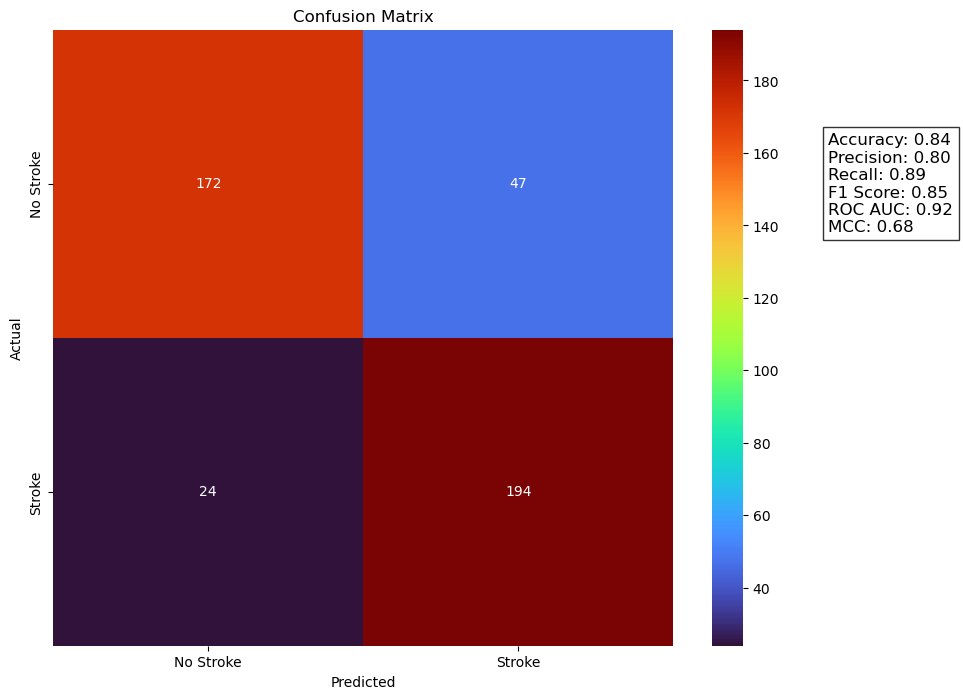

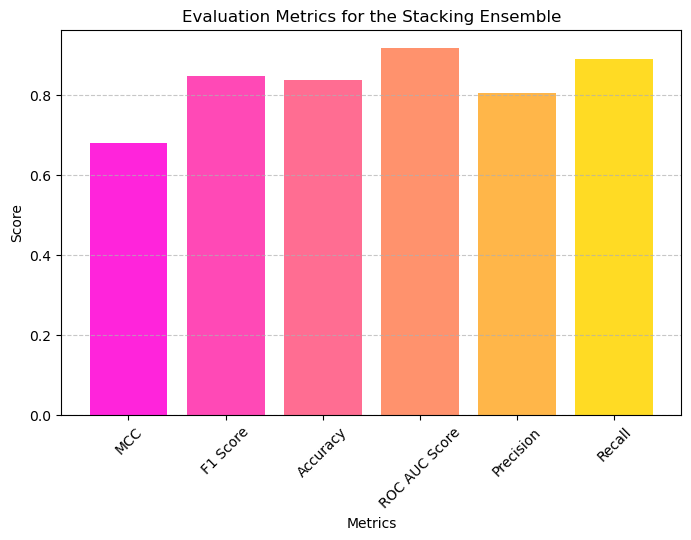

In [81]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='turbo', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
# Add metrics to the plot
plt.text(2.5, 0.5, f"Accuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}\nROC AUC: {roc_auc:.2f}\nMCC: {mcc:.2f}",
fontsize=12, bbox=dict(facecolor='white', alpha=0.8), verticalalignment='center')

plt.show()

# plotting rest of the evaluation metrics in a bar chart for the stacking ensemble

import matplotlib.pyplot as plt

# Filter numeric metrics
metrics_to_plot = {k: v for k, v in evaluation_metrics.items() if isinstance(v, (int, float))}

# Define a color palette
colors = sns.color_palette("spring", len(metrics_to_plot))

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(metrics_to_plot.keys(), metrics_to_plot.values(), color=colors)
plt.title("Evaluation Metrics for the Stacking Ensemble")
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Feature Importance for stroke prediction from the Stacking Ensemble

In [83]:
# Getting Feature importances from the meta-model 
# hasattr() is a Python function that checks if the given object has a specific attribute.
# stacking_clf is a stacking classifier which combines the predictions of base models and uses a meta-model (final estimator) to make the final prediction. 
if hasattr(stacking_clf.final_estimator_, "feature_importances_"):
    importances = stacking_clf.final_estimator_.feature_importances_
    feature_names = stroke_data.columns[:-1]  # Exclude the target variable
    
print(f"Number of features: {len(feature_names)}")
print(f"Number of importances: {len(importances)}")

Number of features: 26
Number of importances: 3


#### Feature Importance from Base Models: 
As there is a mismatch of lengths between importances and features as seen from above because the meta-model sees only the outputs of the base estimators, not the 26 original features. So instead of using the meta-model, we will retrieve and average feature importance from the base models (lightgbm, catboost, and histgradient), which directly work with the original features.
We will first compute the feature importance from each base model and then combine them as stacking classifiers don’t directly provide a single feature importance value, we can calculate the importance of each base model and then average them.
#### We will be looking at how much each feature contributed to the decision-making process of the base models in the stacking ensemble after extracting the feature importances from the already trained base models in the stacking classifier and aggregating them to identify which features are most important for predicting strokes.

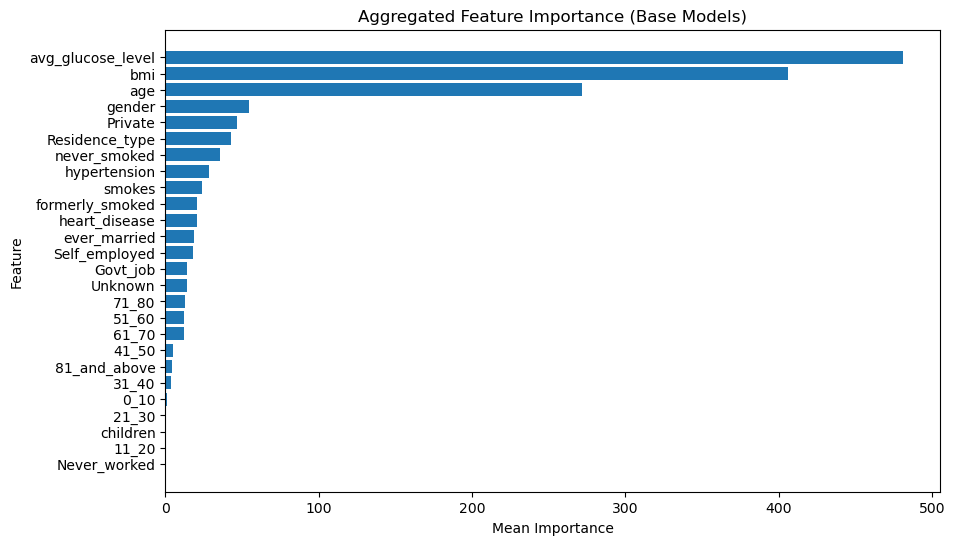

Top Features Contributing to Stroke Prediction:
                   lightgbm   catboost  Mean Importance
avg_glucose_level       946  16.796492       481.398246
bmi                     796  16.279450       406.139725
age                     517  26.864923       271.932462
gender                  104   4.704465        54.352232
Private                  89   4.141284        46.570642
Residence_type           83   3.019266        43.009633
never_smoked             69   2.942167        35.971084
hypertension             54   2.504698        28.252349
smokes                   46   1.774249        23.887124
formerly_smoked          40   1.726274        20.863137
heart_disease            38   2.730603        20.365302
ever_married             35   2.661962        18.830981
Self_employed            35   1.622662        18.311331
Govt_job                 27   1.826829        14.413415
Unknown                  26   2.169479        14.084740
71_80                    24   1.236864        12.618432


In [85]:
# Feature importance from base models
feature_names = stroke_data.columns[:-1]  # Exclude the target variable

# Dictionary to hold feature importances
feature_importance_dict = {}

for name, model in stacking_clf.named_estimators_.items():
    if hasattr(model, "feature_importances_"):
        feature_importance_dict[name] = model.feature_importances_

# Aggregate feature importance
if feature_importance_dict:
    feature_importance_df = pd.DataFrame(feature_importance_dict, index=feature_names)
    feature_importance_df["Mean Importance"] = feature_importance_df.mean(axis=1)
    feature_importance_df = feature_importance_df.sort_values(
        by="Mean Importance", ascending=False
    )
    
# Plot aggregated feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df.index, feature_importance_df["Mean Importance"])
    plt.title("Aggregated Feature Importance (Base Models)")
    plt.xlabel("Mean Importance")
    plt.ylabel("Feature")
    plt.gca().invert_yaxis()
    plt.show()

    print("Top Features Contributing to Stroke Prediction:")
    print(feature_importance_df)
else:
    print("None of the base models provide feature importances.")


##### The bar chart ranks the features based on their mean importance across all base models. 
e.g. For avg_glucose_level
Base model lightgbm has a score feature importance score of 946. A higher number indicates that LightGBM considers this feature to be more important in predicting stroke.
Base model catboost gives it the score of  16.796492 which is smaller compared to LightGBM, meaning CatBoost doesn’t weigh this feature as heavily in its decision-making.
• Mean Importance: 481.398246 : This is the average of the importance scores from LightGBM and CatBoost for the feature avg_glucose_level. It gives a combined importance score, indicating the overall importance of this feature across both models.

#  Hyperparameter Tuning on the Stacking Ensemble

Hyperparameter Tuning on the ensemble model to improve performance further.

In [89]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from scipy.stats import uniform

# Splitting data into features (X) and target (y)
X = stroke_data.drop(columns=['stroke'])
y = stroke_data['stroke']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardizing the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define base models
base_estimators = [
    ('lightgbm', LGBMClassifier(random_state=42, num_threads=-1)),
    ('catboost', CatBoostClassifier(verbose=0, random_state=42)),
    ('histgradient', HistGradientBoostingClassifier(random_state=42, max_bins=255)),
]

# Define the meta-model
meta_model = CatBoostClassifier(verbose=0, random_state=42)

# Define the stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_estimators, final_estimator=meta_model, cv=5  # Use 5-fold cross-validation
)

# -------------------- Use RandomizedSearchCV --------------------
# Define the parameter distribution for randomized search
# For LightGBM, the number of estimators (n_estimators) and learning rate (learning_rate) are being randomized.
# For CatBoost, the number of iterations (iterations) and tree depth (depth) are being tuned.
# For HistGradientBoosting, the maximum number of iterations (max_iter) and learning rate (learning_rate) are being adjusted.
# The meta-model’s iterations and depth are also tuned.

param_dist = {
    'lightgbm__n_estimators': [50, 100, 150],  # Reduce the number of trees
    'lightgbm__learning_rate': uniform(0.05, 0.1),  # Randomize learning rate
    'lightgbm__max_depth': [3, 5, 7, 10],  # Depth of each tree, more options
   
    'catboost__iterations': [50, 100 ,150],  # Reduce iterations
    'catboost__depth': [4, 5],  # Limit the depth of trees
    'catboost__learning_rate': uniform(0.01, 0.1),  # Learning rate for CatBoost
   
    'histgradient__max_iter': [100, 150],  # Reduce max iterations
    'histgradient__learning_rate': uniform(0.05, 0.2),  # Keep learning rate moderate
    
    'final_estimator__iterations': [100, 150, 200],  # Number of iterations (trees) for meta-model
    'final_estimator__depth': [3, 4, 5, 6],  # Depth of trees for the meta-model
    'final_estimator__learning_rate': uniform(0.01, 0.1),  # Learning rate for meta-model
}

# Set up RandomizedSearchCV for the stacking classifier
# It tries 10 different combinations of hyperparameters (randomly sampled) and evaluates performance using 5-fold cross-validation.

random_search = RandomizedSearchCV(
    estimator=stacking_clf, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=10, random_state=42
)

# Fit the model with RandomizedSearchCV - The hyperparameters are tuned during this process
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 2/5; 2/10] START catboost__depth=5, catboost__iterations=150, catboost__learning_rate=0.012058449429580245, final_estimator__depth=4, final_estimator__iterations=150, final_estimator__learning_rate=0.031233911067827615, histgradient__learning_rate=0.08636499344142012, histgradient__max_iter=100, lightgbm__learning_rate=0.11174815096277166, lightgbm__max_depth=5, lightgbm__n_estimators=100
[LightGBM] [Info] Number of positive: 408, number of negative: 407
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 651
[LightGBM] [Info] Number of data points in the train set: 815, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500613 -> initscore=0.002454
[LightGBM] [Info] Start training from score 0.0

RandomizedSearchCV(cv=5,
                   estimator=StackingClassifier(cv=5,
                                                estimators=[('lightgbm',
                                                             LGBMClassifier(num_threads=-1,
                                                                            random_state=42)),
                                                            ('catboost',
                                                             <catboost.core.CatBoostClassifier object at 0x317303ad0>),
                                                            ('histgradient',
                                                             HistGradientBoostingClassifier(random_state=42))],
                                                final_estimator=<catboost.core.CatBoostClassifier object at 0x30f277b60>),
                   n_jobs=-1,
                   param_...
                                        'final_estimator__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x30f06eea0>,
                                        'histgradient__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x31756c650>,
                                        'histgradient__max_iter': [100, 150],
                                        'lightgbm__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x30e451a60>,
                                        'lightgbm__max_depth': [3, 5, 7, 10],
                                        'lightgbm__n_estimators': [50, 100,
                                                                   150]},
                   random_state=42, verbose=10)

##### Getting the best parameters and results of performance of each hyperparameter combination tested during cross-validation

In [91]:
# Print the best parameters and the best score
print("Best Parameters found: ", random_search.best_params_)
print("Best Score found: ", random_search.best_score_)

################# Checking the performance of the parameters combinations  tuned start ######################

# Access the cv_results_ attribute to inspect all combinations tested
results = random_search.cv_results_

# Convert the results to a DataFrame for better readability
df_results = pd.DataFrame(results)

# Sort by mean test score to get the best performing models
df_results_sorted = df_results.sort_values(by='mean_test_score', ascending=False)

# Display the top best performing combinations
print("\nTop Best Hyperparameter Combinations:\n")
print(df_results_sorted)

################# Checking the performance of the parameters combinations  tuned  end ######################


Best Parameters found:  {'catboost__depth': 4, 'catboost__iterations': 50, 'catboost__learning_rate': 0.09021969807540396, 'final_estimator__depth': 3, 'final_estimator__iterations': 100, 'final_estimator__learning_rate': 0.10868869366005172, 'histgradient__learning_rate': 0.20444895385933148, 'histgradient__max_iter': 150, 'lightgbm__learning_rate': 0.07934881747180382, 'lightgbm__max_depth': 7, 'lightgbm__n_estimators': 150}
Best Score found:  0.8479136482179077

Top Best Hyperparameter Combinations:

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
8      23.496221      1.486326         0.010976        0.000556   
5      21.951500      0.404107         0.011899        0.001833   
2      17.210491      0.219434         0.015246        0.001635   
9       9.912151      0.675721         0.009432        0.000538   
4      12.011582      0.261618         0.010453        0.002010   
0      10.420271      0.532911         0.010425        0.001463   
7      12.163377      

#### Refining the search based on the best performing hyperparameter combinations

In [93]:
# Extract the best parameters
best_params = random_search.best_params_

# Refine the search space based on the best found parameters
param_dist_refined = {
    # LightGBM Parameters (Fix the best ones and refine others)
    'lightgbm__n_estimators': [best_params['lightgbm__n_estimators']],  # Keep n_estimators fixed
    'lightgbm__learning_rate': uniform(max(0.01, best_params['lightgbm__learning_rate'] - 0.03), 0.06),
    'lightgbm__max_depth': [best_params['lightgbm__max_depth'] - 1, best_params['lightgbm__max_depth'], best_params['lightgbm__max_depth'] + 1],
    # CatBoost Parameters (Fix the best ones and refine others)
    'catboost__iterations': [best_params['catboost__iterations']],  # Keep iterations fixed
    'catboost__depth': [best_params['catboost__depth']],  # Keep depth fixed
    'catboost__learning_rate': uniform(best_params['catboost__learning_rate'] - 0.03, 0.06),  # Refine learning rate range
   
    # HistGradientBoosting Parameters (Refine based on best results)
    'histgradient__max_iter': [best_params['histgradient__max_iter']],  # Keep max_iter fixed
    'histgradient__learning_rate': uniform(best_params['histgradient__learning_rate'] - 0.05, 0.1),  # Refine learning rate range
   
    # Final Estimator (Meta-model) Parameters (Fix the best ones and refine others)
    'final_estimator__iterations': [best_params['final_estimator__iterations']],  # Keep iterations fixed
    'final_estimator__depth': [best_params['final_estimator__depth']],  # Keep depth fixed
    'final_estimator__learning_rate': uniform(max(0.01, best_params['final_estimator__learning_rate'] - 0.03), 0.06),
}

# Perform a new RandomizedSearchCV with the refined parameter grid
random_search_refined = RandomizedSearchCV(
    estimator=stacking_clf, 
    param_distributions=param_dist_refined, 
    n_iter=15,  # Number of iterations to try
    cv=5,  # Cross-validation folds
    n_jobs=-1, 
    verbose=10, 
    random_state=42
)

# Fit the refined search
random_search_refined.fit(X_train, y_train)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

RandomizedSearchCV(cv=5,
                   estimator=StackingClassifier(cv=5,
                                                estimators=[('lightgbm',
                                                             LGBMClassifier(num_threads=-1,
                                                                            random_state=42)),
                                                            ('catboost',
                                                             <catboost.core.CatBoostClassifier object at 0x317303ad0>),
                                                            ('histgradient',
                                                             HistGradientBoostingClassifier(random_state=42))],
                                                final_estimator=<catboost.core.CatBoostClassifier object at 0x30f277b60>),
                   n_iter=15, n_jobs...
                                        'final_estimator__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x30baf0aa0>,
                                        'histgradient__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x3091942f0>,
                                        'histgradient__max_iter': [150],
                                        'lightgbm__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x317248770>,
                                        'lightgbm__max_depth': [6, 7, 8],
                                        'lightgbm__n_estimators': [150]},
                   random_state=42, verbose=10)

### Predicting and Evaluating using the best Refined Stacking Ensemble

In [95]:
# Print the best parameters and score from the refined search

best_params_refined=random_search_refined.best_params_
print("Refined Best Parameters found: ", random_search_refined.best_params_)
print("Refined Best Score found: ", random_search_refined.best_score_)

# The best estimator after the refined search
best_model_refined = random_search_refined.best_estimator_

# Predict and evaluate on test data using the best model from the refined search
y_pred_refined = best_model_refined.predict(X_test)
y_pred_proba_refined = best_model_refined.predict_proba(X_test)[:, 1]

# Evaluate the refined model
accuracy_refined = accuracy_score(y_test, y_pred_refined)
f1_refined = f1_score(y_test, y_pred_refined)
roc_auc_refined = roc_auc_score(y_test, y_pred_proba_refined)
mcc_refined = matthews_corrcoef(y_test, y_pred_refined)
conf_matrix_refined = confusion_matrix(y_test, y_pred_refined)
precision_refined = precision_score(y_test, y_pred_refined)
recall_refined = recall_score(y_test, y_pred_refined)
fpr_refined, tpr_refined, thresholds_refined = roc_curve(y_test, y_pred_proba_refined)

# Store metrics in a dictionary for easy comparison
evaluation_metrics_refined = {
    "MCC": mcc_refined,
    "F1 Score": f1_refined,
    "Accuracy": accuracy_refined,
    "ROC AUC Score": roc_auc_refined,
    "Precision": precision_refined,
    "Recall": recall_refined,
    "Confusion Matrix": conf_matrix_refined,
    "ROC Curve": {"FPR": fpr_refined, "TPR": tpr_refined, "Thresholds": thresholds_refined},
}

# Print the metrics
for metric, value in evaluation_metrics_refined.items():
    if metric != "ROC Curve":
        print(f"{metric}: {value}")
    else:
        print(f"{metric}:")
        print(f"  FPR: {value['FPR']}")
        print(f"  TPR: {value['TPR']}")
        print(f"  Thresholds: {value['Thresholds']}")

Refined Best Parameters found:  {'catboost__depth': 4, 'catboost__iterations': 50, 'catboost__learning_rate': 0.10121550920493146, 'final_estimator__depth': 3, 'final_estimator__iterations': 100, 'final_estimator__learning_rate': 0.11528849312700898, 'histgradient__learning_rate': 0.23776844503294792, 'histgradient__max_iter': 150, 'lightgbm__learning_rate': 0.05975069668227015, 'lightgbm__max_depth': 6, 'lightgbm__n_estimators': 150}
Refined Best Score found:  0.853781512605042
MCC: 0.7383640555162516
F1 Score: 0.8733624454148472
Accuracy: 0.8672768878718535
ROC AUC Score: 0.9199865946127099
Precision: 0.8333333333333334
Recall: 0.9174311926605505
Confusion Matrix: [[179  40]
 [ 18 200]]
ROC Curve:
  FPR: [0.         0.         0.         0.         0.00456621 0.00456621
 0.00456621 0.00913242 0.00913242 0.00913242 0.00913242 0.01369863
 0.01369863 0.01369863 0.01369863 0.01826484 0.01826484 0.01826484
 0.02283105 0.02283105 0.03652968 0.03652968 0.04109589 0.04109589
 0.0456621  0.04

### Best Parameters for my Stacking Ensemble model 

In [97]:
print("Best Parameters for Stacking Model:")
print(f"Test Size: 0.3")
print(f"Cross-Validation Folds: 5")
print(f"Randomized Search Iterations: 15")
print(f"Refined Best Score: {random_search_refined.best_score_:.4f}")

# LightGBM Parameters
print("\nLightGBM Parameters:")
print(f"  - Learning Rate: {best_params_refined['lightgbm__learning_rate']:.4f}")
print(f"  - Max Depth: {best_params_refined['lightgbm__max_depth']}")
print(f"  - Number of Estimators: {best_params_refined['lightgbm__n_estimators']}")

# CatBoost Parameters
print("\nCatBoost Parameters:")
print(f"  - Learning Rate: {best_params_refined['catboost__learning_rate']:.4f}")
print(f"  - Depth: {best_params_refined['catboost__depth']}")
print(f"  - Iterations: {best_params_refined['catboost__iterations']}")

# HistGradientBoosting Parameters
print("\nHistGradientBoosting Parameters:")
print(f"  - Learning Rate: {best_params_refined['histgradient__learning_rate']:.4f}")
print(f"  - Max Iterations: {best_params_refined['histgradient__max_iter']}")

# Meta-Model (Final Estimator) Parameters
print("\nMeta-Model (CatBoost) Parameters:")
print(f"  - Learning Rate: {best_params_refined['final_estimator__learning_rate']:.4f}")
print(f"  - Depth: {best_params_refined['final_estimator__depth']}")
print(f"  - Iterations: {best_params_refined['final_estimator__iterations']}")

Best Parameters for Stacking Model:
Test Size: 0.3
Cross-Validation Folds: 5
Randomized Search Iterations: 15
Refined Best Score: 0.8538

LightGBM Parameters:
  - Learning Rate: 0.0598
  - Max Depth: 6
  - Number of Estimators: 150

CatBoost Parameters:
  - Learning Rate: 0.1012
  - Depth: 4
  - Iterations: 50

HistGradientBoosting Parameters:
  - Learning Rate: 0.2378
  - Max Iterations: 150

Meta-Model (CatBoost) Parameters:
  - Learning Rate: 0.1153
  - Depth: 3
  - Iterations: 100


## Visualizing Refined Stackig Ensemble model after hyperparameter Tuning

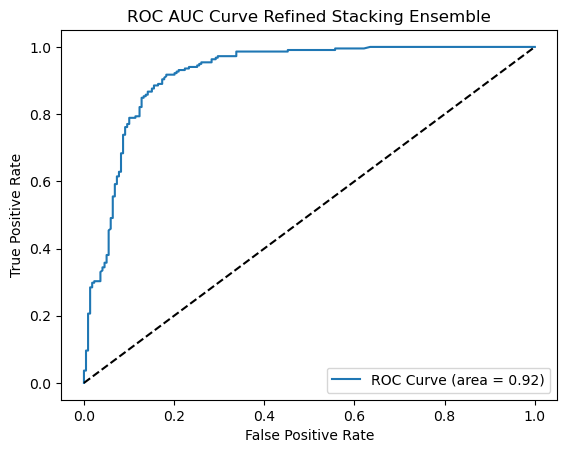

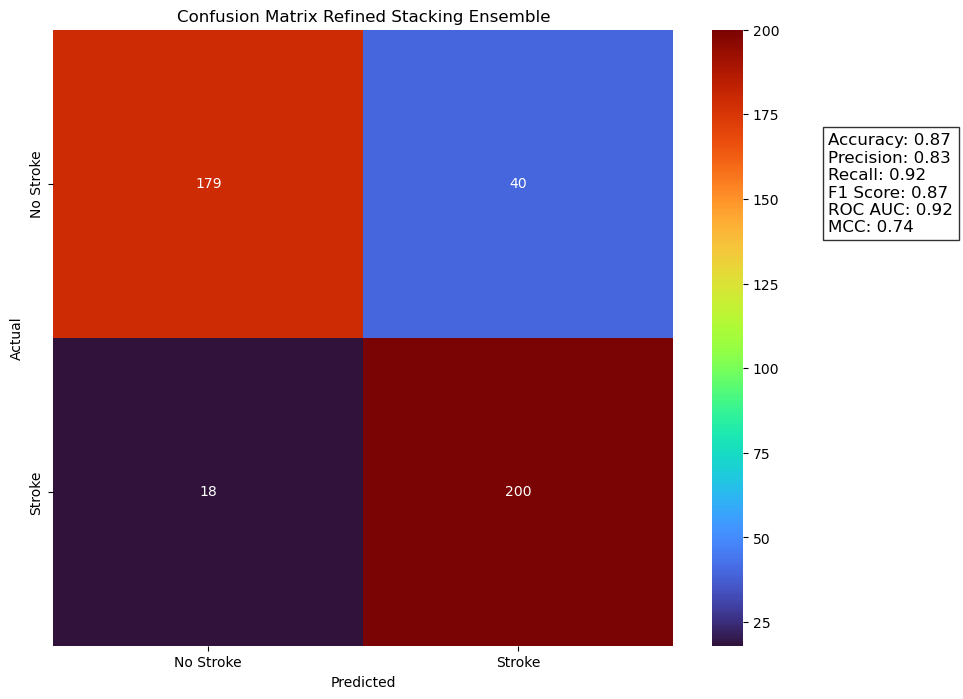

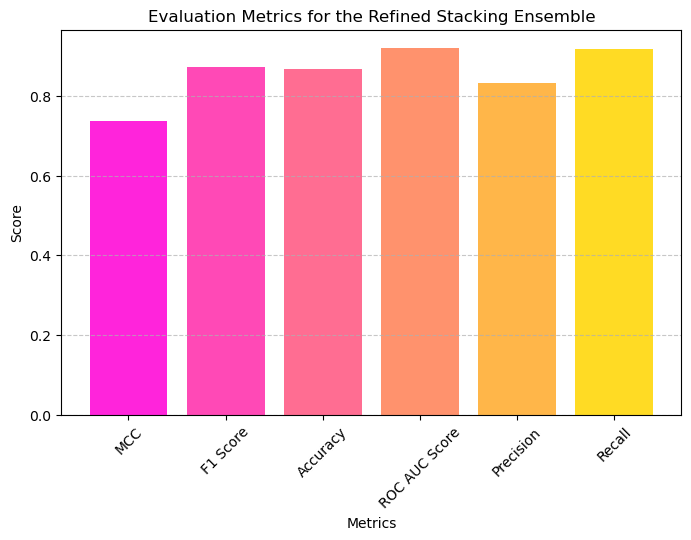

In [99]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr_refined, tpr_refined, label='ROC Curve (area = %0.2f)' % roc_auc_refined)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve Refined Stacking Ensemble')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_refined, annot=True, fmt='d', cmap='turbo', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Refined Stacking Ensemble')
# Add metrics to the plot
plt.text(2.5, 0.5, f"Accuracy: {accuracy_refined:.2f}\nPrecision: {precision_refined:.2f}\nRecall: {recall_refined:.2f}\nF1 Score: {f1_refined:.2f}\nROC AUC: {roc_auc_refined:.2f}\nMCC: {mcc_refined:.2f}",
fontsize=12, bbox=dict(facecolor='white', alpha=0.8), verticalalignment='center')

plt.show()

# plotting rest of the evaluation metrics in a bar chart for the stacking ensemble

import matplotlib.pyplot as plt

# Filter numeric metrics
metrics_to_plot = {k: v for k, v in evaluation_metrics_refined.items() if isinstance(v, (int, float))}

# Define a color palette
colors = sns.color_palette("spring", len(metrics_to_plot))

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(metrics_to_plot.keys(), metrics_to_plot.values(), color=colors)
plt.title("Evaluation Metrics for the Refined Stacking Ensemble")
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Feature importance after Hyperparameter tuning

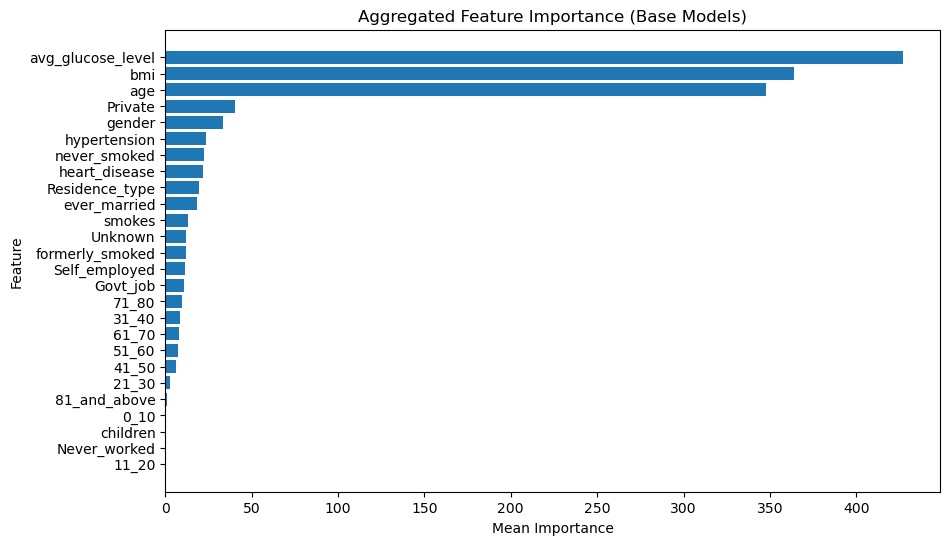

Top Features Contributing to Stroke Prediction:
                   lightgbm   catboost  Mean Importance
avg_glucose_level       842  12.528674       427.264337
bmi                     711  17.408222       364.204111
age                     648  47.113237       347.556618
Private                  77   4.184422        40.592211
gender                   65   2.034131        33.517065
hypertension             46   1.032032        23.516016
never_smoked             44   1.071189        22.535595
heart_disease            43   0.749173        21.874587
Residence_type           39   0.573572        19.786786
ever_married             37   0.287585        18.643793
smokes                   25   1.534718        13.267359
Unknown                  22   2.138901        12.069451
formerly_smoked          23   1.060980        12.030490
Self_employed            22   0.561548        11.280774
Govt_job                 21   1.093763        11.046881
71_80                    19   0.645167         9.822584


In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get the feature names (assuming X is the original dataset)
feature_names = X.columns  # If X is a pandas DataFrame, else use column indices

# Dictionary to hold feature importances from each base model
feature_importance_dict = {}

# Loop through each base model in the stacked classifier
for name, model in best_model_refined.named_estimators_.items():
    # Check if the model has the 'feature_importances_' attribute
    if hasattr(model, "feature_importances_"):
        feature_importance_dict[name] = model.feature_importances_

# If feature importances are available, aggregate them
if feature_importance_dict:
    # Create a DataFrame with the feature importances for each base model
    feature_importance_df = pd.DataFrame(feature_importance_dict, index=feature_names)
    
    # Add a column for the mean importance across all base models
    feature_importance_df["Mean Importance"] = feature_importance_df.mean(axis=1)
    
    # Sort the features by their mean importance
    feature_importance_df = feature_importance_df.sort_values(by="Mean Importance", ascending=False)
    
    # Plot the aggregated feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df.index, feature_importance_df["Mean Importance"])
    plt.title("Aggregated Feature Importance (Base Models)")
    plt.xlabel("Mean Importance")
    plt.ylabel("Feature")
    plt.gca().invert_yaxis()
    plt.show()
    
    # Print the top features
    print("Top Features Contributing to Stroke Prediction:")
    print(feature_importance_df)
else:
    print("None of the base models provide feature importances.")

### Compare and visualize Metrics for first model and hyperparameter tuned model

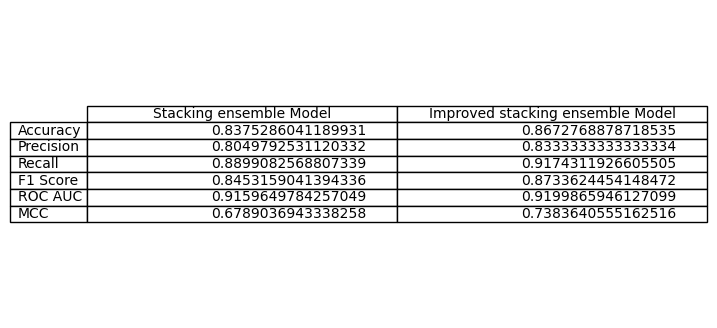

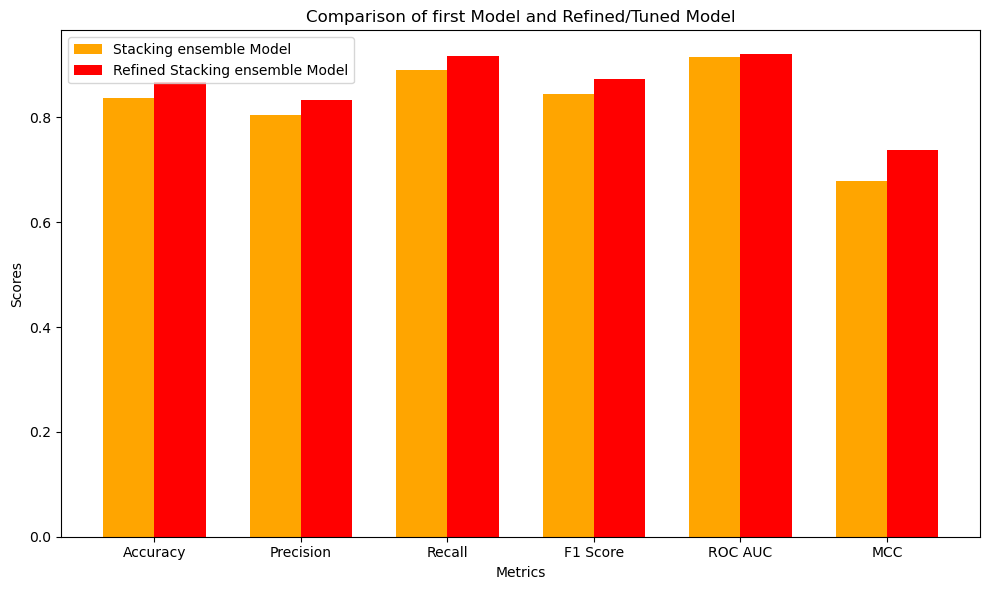

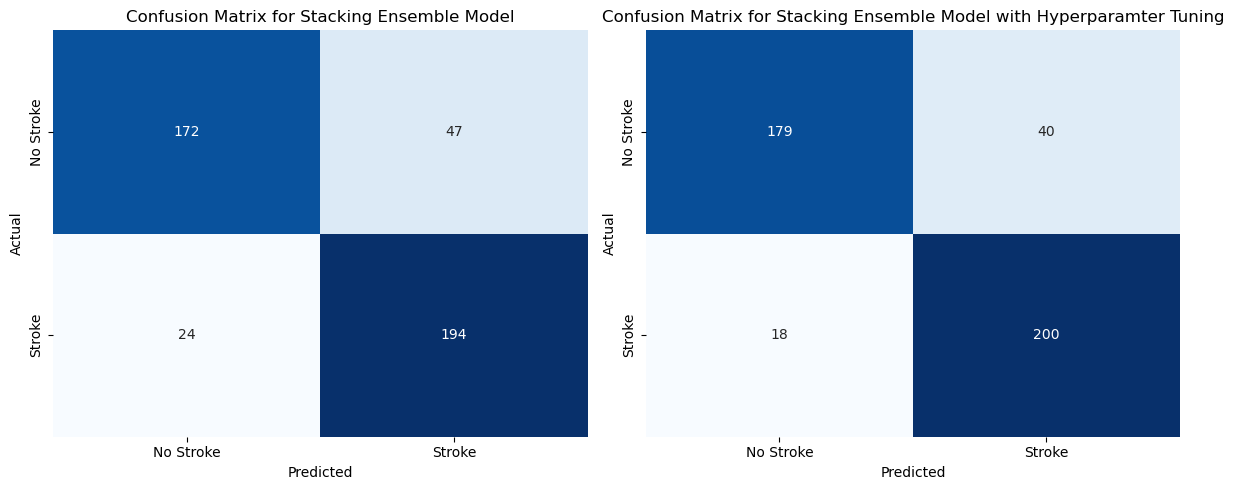

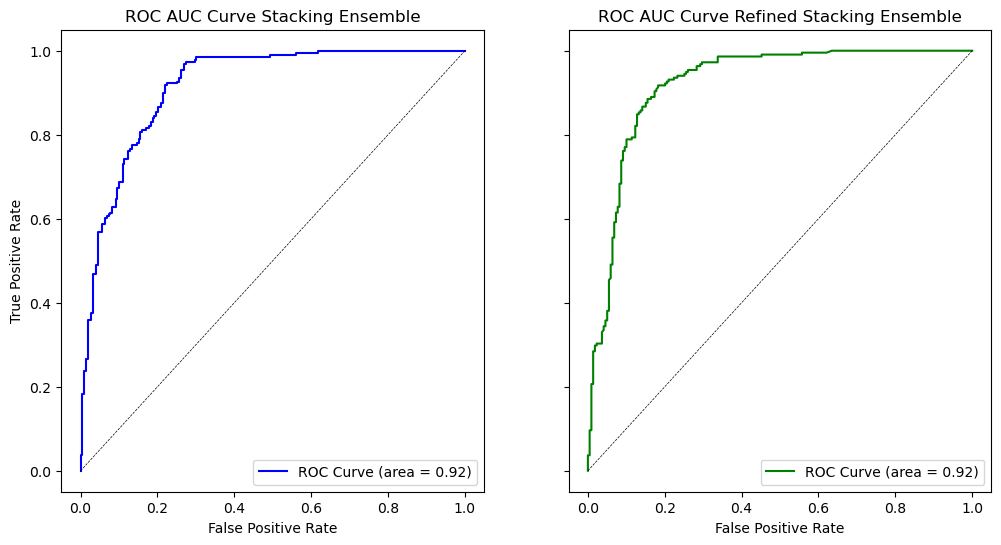

In [103]:
## comparing both metrics for previous and improved models
model_1_metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc,
    'MCC': mcc
}

model_2_metrics = {
    'Accuracy': accuracy_refined,
    'Precision': precision_refined,
    'Recall': recall_refined,
    'F1 Score': f1_refined,
    'ROC AUC': roc_auc_refined,
    'MCC': mcc_refined
}

# Create a DataFrame for easy visualization
metrics_df = pd.DataFrame({
    'Stacking ensemble Model': model_1_metrics,
    'Improved stacking ensemble Model': model_2_metrics
})

# Plot the table
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust size as needed
ax.axis('tight')
ax.axis('off')
ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns, rowLabels=metrics_df.index, loc='center')

plt.show()

# Metrics for Model 1 and Model 2
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'MCC']
model_1_scores = [accuracy, precision, recall, f1, roc_auc, mcc]
model_2_scores = [accuracy_refined, precision_refined, recall_refined, f1_refined, roc_auc_refined, mcc_refined]

# Set positions for the bars
x = np.arange(len(metrics))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Plot bars for both models
ax.bar(x - bar_width/2, model_1_scores, bar_width, label='Stacking ensemble Model', color='orange')
ax.bar(x + bar_width/2, model_2_scores, bar_width, label='Refined Stacking ensemble Model', color='red')

# Add labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of first Model and Refined/Tuned Model')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Plot Confusion Matrices as heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for Model 1
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0], 
            xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
axes[0].set_title('Confusion Matrix for Stacking Ensemble Model')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot confusion matrix for Model 2
sns.heatmap(conf_matrix_refined, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[1], 
            xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
axes[1].set_title('Confusion Matrix for Stacking Ensemble Model with Hyperparamter Tuning')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

# Subplot for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot the initial model's ROC curve
axes[0].plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc, color='blue')
axes[0].plot([0, 1], [0, 1], 'k--', lw=0.5)  # Diagonal reference line
axes[0].set_title('ROC AUC Curve Stacking Ensemble')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend(loc="lower right")

# Plot the refined model's ROC curve
axes[1].plot(fpr_refined, tpr_refined, label='ROC Curve (area = %0.2f)' % roc_auc_refined, color='green')
axes[1].plot([0, 1], [0, 1], 'k--', lw=0.5)  # Diagonal reference line
axes[1].set_title('ROC AUC Curve Refined Stacking Ensemble')
axes[1].set_xlabel('False Positive Rate')
axes[1].legend(loc="lower right")

plt.show()


# Analysis of evaluation metrics for the best model

### • MCC (0.7383): 
MCC is a balanced measure of classification performance that takes into account true positives, true negatives, false positives, and false negatives. It ranges from -1 (perfectly wrong) to +1 (perfectly correct), with 0 indicating no better than random guessing.
The increase from 0.6789 to 0.7122 suggests that the improved model provides a more balanced and reliable performance, with fewer misclassifications overall.

### • F1 Score (0.8734): 
The F1 score is the harmonic mean of precision and recall, and it provides a balanced measure of the model’s performance.
The increase in the F1 score from 0.8453 to 0.8615 suggests that the improved model is not only better at detecting strokes but also at minimizing both false positives and false negatives. This is a good indicator of the overall effectiveness of the model, especially when dealing with imbalanced datasets like stroke prediction.

### • Accuracy (0.8672): 
The improved model shows a clear increase in accuracy, suggesting that the improvements made (e.g., through hyperparameter tuning or adjusting the model’s components) led to better overall performance.The model is correctly predicting more instances of stroke versus non-stroke.

### • Confusion Matrix: 
#### Improvement in True Positives and True Negatives:
After hyperparameter tuning, the model identified 6 additional stroke cases correctly (TP: 194 vs. 200).
The number of correctly predicted no-stroke cases increased (TN: 172 vs. 179).
#### Reduction in Errors:
False negatives (missed stroke cases) dropped from 24 to 18, which is critical in a health-related model.
False positives (wrongly identified stroke cases) reduced slightly from 47 to 40.
#### Overall Impact:
Hyperparameter tuning improved the model's sensitivity (ability to detect strokes) and slightly improved specificity (ability to detect no strokes).
This means the tuned model is better at reducing life-critical errors, particularly in avoiding missed stroke diagnoses.
In a health-related scenario like stroke detection, improving recall is crucial since false negatives (missed stroke cases) can have severe consequences. The improvement here demonstrates a meaningful advancement in the model's ability to minimize critical errors.
This means the tuned model is better at identifying stroke cases, reducing the likelihood of missing true stroke patients.

### • ROC AUC (0.92): 
ROC AUC measures the ability of the model to distinguish between the classes (stroke vs. non-stroke) across all possible thresholds. The improved model shows a small but noticeable increase in ROC AUC, indicating that it has a slightly better overall ability to discriminate between the positive and negative classes. This is a strong indicator of the model’s robustness.
The model is excellent at distinguishing between stroke and non-stroke cases.

### • Precision (0.8333):
Precision measures the proportion of positive predictions (stroke) that are actually correct. The improvement from 0.805 to 0.8333 indicates that the refined model has a slightly better ability to avoid false positives (predicting stroke when there is none). This is important in medical applications, as fewer false positives mean fewer people are wrongly diagnosed as having a stroke.

### • Recall (0.9174):
Recall measures the proportion of actual positive cases (true strokes) that are correctly identified by the model. The improved model’s recall of 0.9174 shows a better ability to detect stroke cases compared to the stacking ensemble model (0.8899). This improvement is crucial because it means the improved model is identifying more stroke cases, which is vital for preventing undiagnosed strokes.
The model correctly identifies 91.74% of the people who actually have a stroke, which is excellent for my goal of maximizing recall to catch all stroke cases.

## Factors most likely to cause stroke
Below are the observations about the factors contributing to stroke prediction:

#### avg_glucose_level: 
This feature has the highest importance, suggesting that blood glucose levels are a significant predictor of stroke risk. It likely indicates a strong correlation between elevated glucose levels and the occurrence of strokes.

#### bmi: 
Body Mass Index is another highly important feature, showing that obesity or weight-related issues might influence stroke risk.

#### age: 
Age is also a critical factor, with older individuals being at higher risk for strokes.
Demographic and Lifestyle Factors:

#### gender: 
Gender has some predictive value, though less important than physiological metrics like glucose and BMI.

#### Residence_type and Private (possibly representing employment type): 
These socio-demographic features contribute moderately to predictions but are less critical compared to health-related features.


#### hypertension and heart_disease: 
These health-related conditions are well-known risk factors for strokes, and their inclusion in the model as moderately important is consistent with clinical understanding.

#### Smoking Behavior:

smokes, formerly_smoked, and never_smoked:
Smoking habits contribute to stroke prediction, with active smokers likely being at higher risk compared to non-smokers or those who quit.

#### Age Ranges:

Specific age ranges (e.g., 61_70, 71_80, 51_60) contribute moderately to the model. This indicates that stroke risk may increase significantly in these age brackets, aligning with general medical knowledge.

### Interpretation:
The results align with medical and clinical understanding of stroke risk:

Physiological indicators (e.g., glucose level, BMI, age) are the most critical factors.
Health conditions (e.g., hypertension, heart disease) and lifestyle factors (e.g., smoking, marital status) provide additional context to assess risk.
Demographic factors (e.g., gender, residence type) are less influential but still play a role in the overall prediction.

### Outcomes from stroke prediction:
##### Health Management:
Focus on controlling blood glucose levels and maintaining a healthy BMI.
Monitor and manage chronic conditions like hypertension and heart disease.

##### Lifestyle Changes:

Encourage smoking cessation and a healthier lifestyle to reduce stroke risks.

##### Demographic Analysis:

Tailor public health initiatives to specific age groups and demographics based on the model's insights.
